In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import datetime

pd.set_option('display.max_columns', None)

In [2]:
prophet_data = pd.read_csv('C:/Users/matte/Downloads/EDA_COMPLETE/clean_datax.csv')
prophet_data

Div  Total Matches        Date   Time Day_Time       HomeTeam  \
0     BL           1530  18/08/2023  19:30    Noche  Werder Bremen   
1     BL           1530  19/08/2023  14:30    Tarde       Augsburg   
2     BL           1530  19/08/2023  14:30    Tarde     Hoffenheim   
3     BL           1530  19/08/2023  14:30    Tarde     Leverkusen   
4     BL           1530  19/08/2023  14:30    Tarde      Stuttgart   
...   ..            ...         ...    ...      ...            ...   
8950  SA           1900  02/08/2020  17:00    Tarde           Spal   
8951  SA           1900  02/08/2020  19:45    Noche        Bologna   
8952  SA           1900  02/08/2020  19:45    Noche          Genoa   
8953  SA           1900  02/08/2020  19:45    Noche          Lecce   
8954  SA           1900  02/08/2020  19:45    Noche       Sassuolo   

           AwayTeam  FTHG  FTAG  TGG FTR  HTHG  HTAG  THGG HTR  HS  AS  HST  \
0     Bayern Munich     0     4    4   A     0     1     1   A   6  25    1   
1        M'gladbach     4     4    8   D     3     3     6   D  20   9    8   
2          Freiburg     1     2    3   A     0     2     2   A  24  17    5   
3        RB Leipzig     3     2    5   H     2     1     3   H  11  13    7   
4            Bochum     5     0    5   H     2     0     2   H  19   4    9   
...             ...   ...   ...  ...  ..   ...   ...   ...  ..  ..  ..  ...   
8950     Fiorentina     1     3    4   A     1     1     2   D   7  20    5   
8951         Torino     1     1    2   D     1     0     1   H  13  13    5   
8952         Verona     3     0    3   H     3     0     3   H   4  13    4   
8953          Parma     3     4    7   A     2     2     4   D  12  18    8   
8954        Udinese     0     1    1   A     0     0     0   D  18   7   14   

      AST  HF  AF  HC  AC  HY  AY  HR  AR  AvgC>2.5  AvgC<2.5  
0      10  16  11   0   6   2   1   0   0      1.34      3.29  
1       6   9  14   8   7   1   2   0   0      1.62      2.31  
2       8   9   9   4   2   0   1   0   0      1.65      2.26  
3       6  13  10   4   5   1   2   0   0      1.68      2.19  
4       1   5  12   7   0   1   1   0   0      1.64      2.26  
...   ...  ..  ..  ..  ..  ..  ..  ..  ..       ...       ...  
8950   11   6  14   3  10   1   1   0   0      1.55      2.45  
8951   11  15  17   7   3   3   3   0   0      1.35      3.14  
8952    3   8  13   4   9   4   0   2   1      1.50      2.55  
8953   11   3   7   5   4   0   2   0   0      1.32      3.34  
8954    3   9  11   6   7   1   1   0   0      1.38      2.99  

[8955 rows x 29 columns]

In [3]:
# Concatenar 'Fecha' y 'Time' en una nueva columna 'Fecha_y_Hora'
prophet_data['Fecha_y_Hora'] = prophet_data['Date'] + ' ' + prophet_data['Time']
prophet_data

Div  Total Matches        Date   Time Day_Time       HomeTeam  \
0     BL           1530  18/08/2023  19:30    Noche  Werder Bremen   
1     BL           1530  19/08/2023  14:30    Tarde       Augsburg   
2     BL           1530  19/08/2023  14:30    Tarde     Hoffenheim   
3     BL           1530  19/08/2023  14:30    Tarde     Leverkusen   
4     BL           1530  19/08/2023  14:30    Tarde      Stuttgart   
...   ..            ...         ...    ...      ...            ...   
8950  SA           1900  02/08/2020  17:00    Tarde           Spal   
8951  SA           1900  02/08/2020  19:45    Noche        Bologna   
8952  SA           1900  02/08/2020  19:45    Noche          Genoa   
8953  SA           1900  02/08/2020  19:45    Noche          Lecce   
8954  SA           1900  02/08/2020  19:45    Noche       Sassuolo   

           AwayTeam  FTHG  FTAG  TGG FTR  HTHG  HTAG  THGG HTR  HS  AS  HST  \
0     Bayern Munich     0     4    4   A     0     1     1   A   6  25    1   
1        M'gladbach     4     4    8   D     3     3     6   D  20   9    8   
2          Freiburg     1     2    3   A     0     2     2   A  24  17    5   
3        RB Leipzig     3     2    5   H     2     1     3   H  11  13    7   
4            Bochum     5     0    5   H     2     0     2   H  19   4    9   
...             ...   ...   ...  ...  ..   ...   ...   ...  ..  ..  ..  ...   
8950     Fiorentina     1     3    4   A     1     1     2   D   7  20    5   
8951         Torino     1     1    2   D     1     0     1   H  13  13    5   
8952         Verona     3     0    3   H     3     0     3   H   4  13    4   
8953          Parma     3     4    7   A     2     2     4   D  12  18    8   
8954        Udinese     0     1    1   A     0     0     0   D  18   7   14   

      AST  HF  AF  HC  AC  HY  AY  HR  AR  AvgC>2.5  AvgC<2.5  \
0      10  16  11   0   6   2   1   0   0      1.34      3.29   
1       6   9  14   8   7   1   2   0   0      1.62      2.31   
2       8   9   9   4   2   0   1   0   0      1.65      2.26   
3       6  13  10   4   5   1   2   0   0      1.68      2.19   
4       1   5  12   7   0   1   1   0   0      1.64      2.26   
...   ...  ..  ..  ..  ..  ..  ..  ..  ..       ...       ...   
8950   11   6  14   3  10   1   1   0   0      1.55      2.45   
8951   11  15  17   7   3   3   3   0   0      1.35      3.14   
8952    3   8  13   4   9   4   0   2   1      1.50      2.55   
8953   11   3   7   5   4   0   2   0   0      1.32      3.34   
8954    3   9  11   6   7   1   1   0   0      1.38      2.99   

          Fecha_y_Hora  
0     18/08/2023 19:30  
1     19/08/2023 14:30  
2     19/08/2023 14:30  
3     19/08/2023 14:30  
4     19/08/2023 14:30  
...                ...  
8950  02/08/2020 17:00  
8951  02/08/2020 19:45  
8952  02/08/2020 19:45  
8953  02/08/2020 19:45  
8954  02/08/2020 19:45  

[8955 rows x 30 columns]

In [4]:
# Calcular la media de la columna 'TGG' utilizando .mean()
media_columna = prophet_data['TGG'].mean()
print(f"La media de la columna 'TGG' es: {media_columna}")

La media de la columna 'TGG' es: 2.8103852596314907


In [5]:
# Calcular la media total de 'TGG' para todos los HomeTeam
media_total_home_teams = prophet_data.groupby('HomeTeam')['TGG'].mean().mean()
print(f"Media total de TGG para todos los HomeTeam: {media_total_home_teams:.2f}")

Media total de TGG para todos los HomeTeam: 2.80


In [6]:
# Calcular la media total de 'TGG' para todos los AwayTeam
media_total_away_teams = prophet_data.groupby('AwayTeam')['TGG'].mean().mean()
print(f"Media total de TGG para todos los AwayTeam: {media_total_away_teams:.2f}")

Media total de TGG para todos los AwayTeam: 2.83


In [7]:
# Calcular la media de la columna 'AvgC>2.5' utilizando .mean()
media_columna1 = prophet_data['AvgC>2.5'].mean()
print(f"La media de la columna 'AvgC>2.5' es: {media_columna1}")

La media de la columna 'AvgC>2.5' es: 1.8740122836404243


In [8]:
# Calcular la media de la columna 'AvgC<2.5' utilizando .mean()
media_columna2 = prophet_data['AvgC<2.5'].mean()
print(f"La media de la columna 'AvgC<2.5' es: {media_columna2}")

La media de la columna 'AvgC<2.5' es: 2.1095231714126186


In [9]:
# Calcular la media de 'TGG' para cada valor único en 'Div'
media_por_div = prophet_data.groupby('Div')['TGG'].mean()
print("Media de TGG por cada valor único en Div:")
print(media_por_div)

Media de TGG por cada valor único en Div:
Div
BL     3.150327
L1     2.732174
LLG    2.529474
PL     2.873158
SA     2.825789
Name: TGG, dtype: float64


In [10]:
# Calcular la media de 'AvgC>2.5' para cada valor único en 'Div'
media_por_div1 = prophet_data.groupby('Div')['AvgC>2.5'].mean()
print("Media de AvgC>2.5 por cada valor único en Div:")
print(media_por_div1)

Media de AvgC>2.5 por cada valor único en Div:
Div
BL     1.644791
L1     1.925490
LLG    2.118026
PL     1.810253
SA     1.831605
Name: AvgC>2.5, dtype: float64


In [11]:
# Calcular la media de 'AvgC<2.5' para cada valor único en 'Div'
media_por_div2 = prophet_data.groupby('Div')['AvgC<2.5'].mean()
print("Media de AvgC<2.5 por cada valor único en Div:")
print(media_por_div2)

Media de AvgC<2.5 por cada valor único en Div:
Div
BL     2.459732
L1     2.015606
LLG    1.860558
PL     2.169737
SA     2.101532
Name: AvgC<2.5, dtype: float64


In [12]:
# Contar los partidos con más de 2.5 goles y menos de 2.5 goles en todo el DataFrame
partidos_mas_25_goles_total = (prophet_data['TGG'] > 2.5).sum()
partidos_menos_25_goles_total = (prophet_data['TGG'] <= 2.5).sum()

print("Para todo el DataFrame:")
print(f"Partidos con más de 2.5 goles: {partidos_mas_25_goles_total}")
print(f"Partidos con menos de o igual a 2.5 goles: {partidos_menos_25_goles_total}")

Para todo el DataFrame:
Partidos con más de 2.5 goles: 4769
Partidos con menos de o igual a 2.5 goles: 4186


In [13]:
# Contar los partidos con más de 2.5 goles y menos de 2.5 goles por división
partidos_mas_25_goles_por_division = prophet_data[prophet_data['TGG'] > 2.5].groupby('Div').size()
partidos_menos_25_goles_por_division = prophet_data[prophet_data['TGG'] <= 2.5].groupby('Div').size()

# Imprimir los resultados por división
print("Para todo el DataFrame, por división:")
for division in prophet_data['Div'].unique():
    mas_25 = partidos_mas_25_goles_por_division.get(division, 0)
    menos_25 = partidos_menos_25_goles_por_division.get(division, 0)
    print(f"División {division}:")
    print(f"  Partidos con más de 2.5 goles: {mas_25}")
    print(f"  Partidos con menos de o igual a 2.5 goles: {menos_25}")

Para todo el DataFrame, por división:
División BL:
  Partidos con más de 2.5 goles: 934
  Partidos con menos de o igual a 2.5 goles: 596
División LLG:
  Partidos con más de 2.5 goles: 865
  Partidos con menos de o igual a 2.5 goles: 1035
División L1:
  Partidos con más de 2.5 goles: 905
  Partidos con menos de o igual a 2.5 goles: 820
División PL:
  Partidos con más de 2.5 goles: 1039
  Partidos con menos de o igual a 2.5 goles: 861
División SA:
  Partidos con más de 2.5 goles: 1026
  Partidos con menos de o igual a 2.5 goles: 874


In [14]:
# Filtrar partidos con más de 2.5 goles
partidos_mas_25_goles = prophet_data[prophet_data['TGG'] > 2.5]

# Agrupar por 'Div' y 'HomeTeam' y 'AwayTeam', luego contar
ranking_por_liga = (
    partidos_mas_25_goles.groupby('Div')[['HomeTeam', 'AwayTeam']]
    .apply(lambda x: x.stack().value_counts())
    .groupby(level=0)
    .sum()
    .sort_values(ascending=False)
)

# Mostrar el ranking por liga
print("Ranking de equipos que más veces pasan los 2.5 goles por partido en cada liga:")
print(ranking_por_liga)

Ranking de equipos que más veces pasan los 2.5 goles por partido en cada liga:
Div
PL     2078
SA     2052
BL     1868
L1     1810
LLG    1730
Name: count, dtype: int64


In [15]:
# Filtrar partidos con menos de 2.5 goles
partidos_menos_25_goles = prophet_data[prophet_data['TGG'] < 2.5]

# Agrupar por 'Div' y 'HomeTeam' y 'AwayTeam', luego contar
ranking_por_liga = (
    partidos_menos_25_goles.groupby('Div')[['HomeTeam', 'AwayTeam']]
    .apply(lambda x: x.stack().value_counts())
    .groupby(level=0)
    .sum()
    .sort_values(ascending=False)
)

# Mostrar el ranking por liga
print("Ranking de equipos que menos veces pasan los 2.5 goles por partido en cada liga:")
print(ranking_por_liga)

Ranking de equipos que menos veces pasan los 2.5 goles por partido en cada liga:
Div
LLG    2070
SA     1748
PL     1722
L1     1640
BL     1192
Name: count, dtype: int64


In [16]:
# Filtrar partidos con más de 2.5 goles
partidos_mas_25_goles = prophet_data[prophet_data['TGG'] > 2.5]

# Concatenar 'HomeTeam' y 'AwayTeam', contar las ocurrencias
equipos_mas_25 = pd.concat([partidos_mas_25_goles['HomeTeam'], partidos_mas_25_goles['AwayTeam']])
ranking_equipos = equipos_mas_25.value_counts().reset_index()
ranking_equipos.columns = ['Equipo', 'Veces > 2.5 goles']

# Mostrar el ranking
print("Ranking de equipos que más veces pasan los 2.5 goles por partido:")
print(ranking_equipos)

Ranking de equipos que más veces pasan los 2.5 goles por partido:
            Equipo  Veces > 2.5 goles
0    Bayern Munich                132
1         Sassuolo                125
2         Man City                120
3         Dortmund                120
4        Tottenham                119
..             ...                ...
128       Le Havre                 17
129         Amiens                 17
130        Leganes                 15
131         Huesca                 12
132     Las Palmas                 11

[133 rows x 2 columns]


In [17]:
# Filtrar partidos con más de 2.5 goles
partidos_mas_25_goles = prophet_data[prophet_data['TGG'] > 2.5]

# Concatenar 'HomeTeam' y 'AwayTeam', contar las ocurrencias
equipos_mas_25 = pd.concat([partidos_mas_25_goles['HomeTeam'], partidos_mas_25_goles['AwayTeam']])
ranking_equipos = equipos_mas_25.value_counts().reset_index()
ranking_equipos.columns = ['Equipo', 'Veces > 2.5 goles']

# Obtener el top 10
top_10_equipos = ranking_equipos.head(10)

# Mostrar el ranking
print("Top 10 equipos que más veces pasan los 2.5 goles por partido:")
print(top_10_equipos)

Top 10 equipos que más veces pasan los 2.5 goles por partido:
          Equipo  Veces > 2.5 goles
0  Bayern Munich                132
1       Sassuolo                125
2       Man City                120
3       Dortmund                120
4      Tottenham                119
5      Liverpool                117
6       Atalanta                117
7     Hoffenheim                116
8     M'gladbach                116
9       Paris SG                115


In [18]:
# Obtener los 10 equipos principales que más veces pasan los 2.5 goles por partido
top_10_equipos_lista = top_10_equipos['Equipo'].tolist()

# Contar cuántas veces aparece cada uno de los 10 equipos como HomeTeam o AwayTeam
apariciones_top_10 = {}
for equipo in top_10_equipos_lista:
    count = prophet_data[(prophet_data['HomeTeam'] == equipo) | (prophet_data['AwayTeam'] == equipo)].shape[0]
    apariciones_top_10[equipo] = count

# Mostrar los resultados
for equipo, count in apariciones_top_10.items():
    print(f"{equipo} aparece en la muestra {count} veces.")

Bayern Munich aparece en la muestra 170 veces.
Sassuolo aparece en la muestra 190 veces.
Man City aparece en la muestra 190 veces.
Dortmund aparece en la muestra 170 veces.
Tottenham aparece en la muestra 190 veces.
Liverpool aparece en la muestra 190 veces.
Atalanta aparece en la muestra 190 veces.
Hoffenheim aparece en la muestra 170 veces.
M'gladbach aparece en la muestra 170 veces.
Paris SG aparece en la muestra 175 veces.


In [19]:
# Contar cuántas veces cada equipo del top 10 fue HomeTeam en partidos con más de 2.5 goles
home_counts = partidos_mas_25_goles['HomeTeam'].value_counts()

# Contar cuántas veces cada equipo del top 10 fue AwayTeam en partidos con más de 2.5 goles
away_counts = partidos_mas_25_goles['AwayTeam'].value_counts()

# Filtrar solo los equipos del top 10
top_10_home_counts = home_counts[top_10_equipos['Equipo']].fillna(0)
top_10_away_counts = away_counts[top_10_equipos['Equipo']].fillna(0)

# Combinar los resultados
top_10_combined = pd.DataFrame({
    'Equipo': top_10_equipos['Equipo'],
    'Veces Home': top_10_home_counts.values,
    'Veces Away': top_10_away_counts.values
})

# Mostrar el resultado
print("Top 10 equipos con más de 2.5 goles, distribuidos como Home y Away:")
print(top_10_combined)

Top 10 equipos con más de 2.5 goles, distribuidos como Home y Away:
          Equipo  Veces Home  Veces Away
0  Bayern Munich          65          67
1       Sassuolo          60          65
2       Man City          66          54
3       Dortmund          65          55
4      Tottenham          60          59
5      Liverpool          56          61
6       Atalanta          63          54
7     Hoffenheim          61          55
8     M'gladbach          58          58
9       Paris SG          62          53


In [20]:
# Asegúrate de que 'Date' sea tipo datetime
prophet_data['Date'] = pd.to_datetime(prophet_data['Date'])

# Filtrar partidos con más de 2.5 goles en el último año
partidos_mas_25_goles_ultimo_ano = prophet_data[
    (prophet_data['TGG'] > 2.5) &
    (prophet_data['Date'] >= '2023-08-01') &
    (prophet_data['Date'] <= '2024-07-31')
]

C:\Users\matte\AppData\Local\Temp\ipykernel_10812\3703096865.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  prophet_data['Date'] = pd.to_datetime(prophet_data['Date'])


In [21]:
# Verificar la cantidad de datos disponibles para el último año
print(prophet_data[
    (prophet_data['Date'] >= '2023-08-01') &
    (prophet_data['Date'] <= '2024-07-31')
].shape)

(1752, 30)


In [22]:
# Concatenar 'HomeTeam' y 'AwayTeam', contar las ocurrencias
equipos_mas_25_ultimo_ano = pd.concat([partidos_mas_25_goles_ultimo_ano['HomeTeam'], partidos_mas_25_goles_ultimo_ano['AwayTeam']])
ranking_equipos_ultimo_ano = equipos_mas_25_ultimo_ano.value_counts().reset_index()
ranking_equipos_ultimo_ano.columns = ['Equipo', 'Veces > 2.5 goles']

In [23]:
ranking_equipos_ultimo_ano

Equipo  Veces > 2.5 goles
0          Tottenham                 30
1      Bayern Munich                 28
2   Sheffield United                 27
3         Hoffenheim                 27
4              Luton                 27
..               ...                ...
91           FC Koln                 12
92          Mallorca                 11
93            Alaves                 11
94        Las Palmas                 11
95             Cadiz                 10

[96 rows x 2 columns]

In [24]:
# Calcular la media de 'AvgC>2.5' para los 10 equipos principales
media_avgc_mas_25_top_10 = {}
for equipo in top_10_equipos_lista:
    equipo_partidos = prophet_data[(prophet_data['HomeTeam'] == equipo) | (prophet_data['AwayTeam'] == equipo)]
    media_avgc = equipo_partidos['AvgC>2.5'].mean()
    media_avgc_mas_25_top_10[equipo] = media_avgc

# Mostrar las medias
for equipo, media in media_avgc_mas_25_top_10.items():
    print(f"La media de Avg>2.5 de {equipo} es: {media:.2f}")

La media de Avg>2.5 de Bayern Munich es: 1.31
La media de Avg>2.5 de Sassuolo es: 1.66
La media de Avg>2.5 de Man City es: 1.53
La media de Avg>2.5 de Dortmund es: 1.47
La media de Avg>2.5 de Tottenham es: 1.73
La media de Avg>2.5 de Liverpool es: 1.53
La media de Avg>2.5 de Atalanta es: 1.66
La media de Avg>2.5 de Hoffenheim es: 1.54
La media de Avg>2.5 de M'gladbach es: 1.59
La media de Avg>2.5 de Paris SG es: 1.48


In [25]:
# Filtrar partidos con menos de 2.5 goles
partidos_menos_25_goles = prophet_data[prophet_data['TGG'] < 2.5]

# Concatenar 'HomeTeam' y 'AwayTeam', contar las ocurrencias
equipos_menos_25 = pd.concat([partidos_menos_25_goles['HomeTeam'], partidos_menos_25_goles['AwayTeam']])
ranking_equipos = equipos_menos_25.value_counts().reset_index()
ranking_equipos.columns = ['Equipo', 'Veces < 2.5 goles']

# Mostrar el ranking
print("Ranking de equipos que menos veces pasan los 2.5 goles por partido:")
print(ranking_equipos)

Ranking de equipos que menos veces pasan los 2.5 goles por partido:
                 Equipo  Veces < 2.5 goles
0                Getafe                123
1            Ath Bilbao                117
2               Osasuna                114
3               Sevilla                114
4              Sociedad                110
..                  ...                ...
128  Fortuna Dusseldorf                 13
129      Greuther Furth                 12
130              Amiens                 11
131             Crotone                 11
132               Luton                 11

[133 rows x 2 columns]


In [26]:
# Filtrar partidos con menos de 2.5 goles
partidos_menos_25_goles = prophet_data[prophet_data['TGG'] < 2.5]

# Concatenar 'HomeTeam' y 'AwayTeam', contar las ocurrencias
equipos_menos_25 = pd.concat([partidos_menos_25_goles['HomeTeam'], partidos_menos_25_goles['AwayTeam']])
ranking_equipos = equipos_menos_25.value_counts().reset_index()
ranking_equipos.columns = ['Equipo', 'Veces < 2.5 goles']

# Obtener el top 10
top_10_equipos = ranking_equipos.head(10)

# Mostrar el ranking
print("Top 10 equipos que menos veces pasan los 2.5 goles por partido:")
print(top_10_equipos)

Top 10 equipos que menos veces pasan los 2.5 goles por partido:
           Equipo  Veces < 2.5 goles
0          Getafe                123
1      Ath Bilbao                117
2         Osasuna                114
3         Sevilla                114
4        Sociedad                110
5          Wolves                107
6          Torino                106
7  Crystal Palace                105
8           Celta                103
9         Everton                103


In [27]:
# Obtener los 10 equipos principales que menos veces pasan los 2.5 goles por partido
top_10_equipos_lista = top_10_equipos['Equipo'].tolist()

# Contar cuántas veces aparece cada uno de los 10 equipos como HomeTeam o AwayTeam
apariciones_top_10 = {}
for equipo in top_10_equipos_lista:
    count = prophet_data[(prophet_data['HomeTeam'] == equipo) | (prophet_data['AwayTeam'] == equipo)].shape[0]
    apariciones_top_10[equipo] = count

# Mostrar los resultados
for equipo, count in apariciones_top_10.items():
    print(f"{equipo} aparece en la muestra {count} veces.")

Getafe aparece en la muestra 190 veces.
Ath Bilbao aparece en la muestra 190 veces.
Osasuna aparece en la muestra 190 veces.
Sevilla aparece en la muestra 190 veces.
Sociedad aparece en la muestra 190 veces.
Wolves aparece en la muestra 190 veces.
Torino aparece en la muestra 190 veces.
Crystal Palace aparece en la muestra 190 veces.
Celta aparece en la muestra 190 veces.
Everton aparece en la muestra 190 veces.


In [28]:
# Contar cuántas veces cada equipo del top 10 fue HomeTeam en partidos con menos de 2.5 goles
home_counts = partidos_menos_25_goles['HomeTeam'].value_counts()

# Contar cuántas veces cada equipo del top 10 fue AwayTeam en partidos con más de 2.5 goles
away_counts = partidos_menos_25_goles['AwayTeam'].value_counts()

# Filtrar solo los equipos del top 10
top_10_home_counts = home_counts[top_10_equipos['Equipo']].fillna(0)
top_10_away_counts = away_counts[top_10_equipos['Equipo']].fillna(0)

# Combinar los resultados
top_10_combined = pd.DataFrame({
    'Equipo': top_10_equipos['Equipo'],
    'Veces Home': top_10_home_counts.values,
    'Veces Away': top_10_away_counts.values
})

# Mostrar el resultado
print("Top 10 equipos con menos de 2.5 goles, distribuidos como Home y Away:")
print(top_10_combined)

Top 10 equipos con menos de 2.5 goles, distribuidos como Home y Away:
           Equipo  Veces Home  Veces Away
0          Getafe          61          62
1      Ath Bilbao          57          60
2         Osasuna          55          59
3         Sevilla          56          58
4        Sociedad          58          52
5          Wolves          53          54
6          Torino          52          54
7  Crystal Palace          55          50
8           Celta          51          52
9         Everton          55          48


In [29]:
# Filtrar partidos con menos de 2.5 goles en el último año
partidos_menos_25_goles_ultimo_ano = prophet_data[
    (prophet_data['TGG'] < 2.5) &
    (prophet_data['Date'] >= '2023-08-01') &
    (prophet_data['Date'] <= '2024-07-31')
]

# Concatenar 'HomeTeam' y 'AwayTeam', contar las ocurrencias
equipos_menos_25_ultimo_ano = pd.concat([partidos_menos_25_goles_ultimo_ano['HomeTeam'], partidos_menos_25_goles_ultimo_ano['AwayTeam']])
ranking_equipos_menos_25_ultimo_ano = equipos_menos_25_ultimo_ano.value_counts().reset_index()
ranking_equipos_menos_25_ultimo_ano.columns = ['Equipo', 'Veces < 2.5 goles']

# Obtener el top 10
top_10_equipos_menos_25_ultimo_ano = ranking_equipos_menos_25_ultimo_ano.head(10)

# Mostrar el ranking de equipos con menos de 2.5 goles por partido para el último año
print("Top 10 equipos que menos veces pasan los 2.5 goles por partido (último año):")
print(top_10_equipos_menos_25_ultimo_ano)

Top 10 equipos que menos veces pasan los 2.5 goles por partido (último año):
       Equipo  Veces < 2.5 goles
0       Cadiz                 28
1    Mallorca                 27
2  Las Palmas                 27
3      Alaves                 27
4      Torino                 26
5      Empoli                 26
6       Lecce                 24
7   Vallecano                 24
8     Udinese                 24
9       Betis                 23


In [30]:
# Calcular la media de 'AvgC<2.5' para los 10 equipos principales
media_avgc_menos_25_top_10 = {}
for equipo in top_10_equipos_lista:
    equipo_partidos = prophet_data[(prophet_data['HomeTeam'] == equipo) | (prophet_data['AwayTeam'] == equipo)]
    media_avgc = equipo_partidos['AvgC<2.5'].mean()
    media_avgc_menos_25_top_10[equipo] = media_avgc

# Mostrar las medias
for equipo, media in media_avgc_menos_25_top_10.items():
    print(f"La media de AvgC<2.5 de {equipo} es: {media:.2f}")

La media de AvgC<2.5 de Getafe es: 1.54
La media de AvgC<2.5 de Ath Bilbao es: 1.73
La media de AvgC<2.5 de Osasuna es: 1.74
La media de AvgC<2.5 de Sevilla es: 1.81
La media de AvgC<2.5 de Sociedad es: 1.76
La media de AvgC<2.5 de Wolves es: 1.88
La media de AvgC<2.5 de Torino es: 1.89
La media de AvgC<2.5 de Crystal Palace es: 1.90
La media de AvgC<2.5 de Celta es: 1.81
La media de AvgC<2.5 de Everton es: 1.98


In [31]:
# Calcular la media de goles (TGG) para los 10 equipos principales con menos de 2.5 goles
media_goles_menos_25_top_10 = {}
for equipo in top_10_equipos_lista:
    equipo_partidos = prophet_data[(prophet_data['HomeTeam'] == equipo) | (prophet_data['AwayTeam'] == equipo)]
    media_goles = equipo_partidos['TGG'].mean()
    media_goles_menos_25_top_10[equipo] = media_goles

# Mostrar las medias de goles
for equipo, media_goles in media_goles_menos_25_top_10.items():
    print(f"La media de goles (TGG) de {equipo} es: {media_goles:.2f}")

La media de goles (TGG) de Getafe es: 2.11
La media de goles (TGG) de Ath Bilbao es: 2.28
La media de goles (TGG) de Osasuna es: 2.38
La media de goles (TGG) de Sevilla es: 2.42
La media de goles (TGG) de Sociedad es: 2.39
La media de goles (TGG) de Wolves es: 2.44
La media de goles (TGG) de Torino es: 2.50
La media de goles (TGG) de Crystal Palace es: 2.57
La media de goles (TGG) de Celta es: 2.54
La media de goles (TGG) de Everton es: 2.56


In [32]:
# Filtrar partidos con más de 2.5 goles
partidos_mas_25_goles = prophet_data[prophet_data['TGG'] > 2.5]

# Contar apariciones como HomeTeam y AwayTeam
top_10_mas_25_home = partidos_mas_25_goles['HomeTeam'].value_counts().nlargest(10)
top_10_mas_25_away = partidos_mas_25_goles['AwayTeam'].value_counts().nlargest(10)

print("Top 10 de equipos con más partidos con más de 2.5 goles:")
print("Como HomeTeam:")
print(top_10_mas_25_home)
print("\nComo AwayTeam:")
print(top_10_mas_25_away)

Top 10 de equipos con más partidos con más de 2.5 goles:
Como HomeTeam:
HomeTeam
Man City         66
Dortmund         65
Arsenal          65
Bayern Munich    65
Atalanta         63
Paris SG         62
Hoffenheim       61
Aston Villa      60
Tottenham        60
Sassuolo         60
Name: count, dtype: int64

Como AwayTeam:
AwayTeam
Bayern Munich    67
Sassuolo         65
Milan            63
Liverpool        61
Tottenham        59
Roma             59
Chelsea          59
Inter            58
M'gladbach       58
Ein Frankfurt    57
Name: count, dtype: int64


In [33]:
# Filtrar partidos con menos de o igual a 2.5 goles
partidos_menos_25_goles = prophet_data[prophet_data['TGG'] <= 2.5]

# Contar apariciones como HomeTeam y AwayTeam
top_10_menos_25_home = partidos_menos_25_goles['HomeTeam'].value_counts().nlargest(10)
top_10_menos_25_away = partidos_menos_25_goles['AwayTeam'].value_counts().nlargest(10)

print("\nTop 10 de equipos con menos partidos con más de 2.5 goles:")
print("Como HomeTeam:")
print(top_10_menos_25_home)
print("\nComo AwayTeam:")
print(top_10_menos_25_away)


Top 10 de equipos con menos partidos con más de 2.5 goles:
Como HomeTeam:
HomeTeam
Getafe            61
Sociedad          58
Ath Bilbao        57
Sevilla           56
Osasuna           55
Crystal Palace    55
Everton           55
Wolves            53
Udinese           53
Valencia          53
Name: count, dtype: int64

Como AwayTeam:
AwayTeam
Getafe        62
Ath Bilbao    60
Osasuna       59
Sevilla       58
Verona        56
Ath Madrid    56
Wolves        54
Torino        54
Betis         54
Sociedad      52
Name: count, dtype: int64


In [34]:
prophet_data.columns

Index(['Div', 'Total Matches', 'Date', 'Time', 'Day_Time', 'HomeTeam',
       'AwayTeam', 'FTHG', 'FTAG', 'TGG', 'FTR', 'HTHG', 'HTAG', 'THGG', 'HTR',
       'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR', 'AvgC>2.5', 'AvgC<2.5', 'Fecha_y_Hora'],
      dtype='object')

In [36]:
prophet_data.drop(columns = ['Total Matches', 'Date', 'Time', 'Day_Time', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'THGG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR','AR'], inplace = True)
prophet_data

Div       HomeTeam       AwayTeam  TGG  AvgC>2.5  AvgC<2.5  \
0     BL  Werder Bremen  Bayern Munich    4      1.34      3.29   
1     BL       Augsburg     M'gladbach    8      1.62      2.31   
2     BL     Hoffenheim       Freiburg    3      1.65      2.26   
3     BL     Leverkusen     RB Leipzig    5      1.68      2.19   
4     BL      Stuttgart         Bochum    5      1.64      2.26   
...   ..            ...            ...  ...       ...       ...   
8950  SA           Spal     Fiorentina    4      1.55      2.45   
8951  SA        Bologna         Torino    2      1.35      3.14   
8952  SA          Genoa         Verona    3      1.50      2.55   
8953  SA          Lecce          Parma    7      1.32      3.34   
8954  SA       Sassuolo        Udinese    1      1.38      2.99   

          Fecha_y_Hora  
0     18/08/2023 19:30  
1     19/08/2023 14:30  
2     19/08/2023 14:30  
3     19/08/2023 14:30  
4     19/08/2023 14:30  
...                ...  
8950  02/08/2020 17:00  
8951  02/08/2020 19:45  
8952  02/08/2020 19:45  
8953  02/08/2020 19:45  
8954  02/08/2020 19:45  

[8955 rows x 7 columns]

In [38]:
prophet_data['Fecha_y_Hora'] = pd.to_datetime(prophet_data['Fecha_y_Hora'])

# Establecer 'Date' como índice
prophet_data.set_index('Fecha_y_Hora', inplace=True)

# Ahora puedes utilizar resample sobre el DataFrame con índice datetime
prophet_data_FTR = prophet_data.resample('D').sum()
print(prophet_data_FTR.shape)
prophet_data_FTR.head()

(1760, 6)


C:\Users\matte\AppData\Local\Temp\ipykernel_10812\727375564.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  prophet_data['Fecha_y_Hora'] = pd.to_datetime(prophet_data['Fecha_y_Hora'])


Div  \
Fecha_y_Hora                             
2019-08-09                        L1PL   
2019-08-10    PLPLPLPLPLL1PLL1L1L1L1L1   
2019-08-11                L1PLPLL1PLL1   
2019-08-12                           0   
2019-08-13                           0   

                                                       HomeTeam  \
Fecha_y_Hora                                                      
2019-08-09                                      MonacoLiverpool   
2019-08-10    West HamBournemouthBurnleyCrystal PalaceWatfor...   
2019-08-11    LilleLeicesterNewcastleStrasbourgMan UnitedPar...   
2019-08-12                                                    0   
2019-08-13                                                    0   

                                                       AwayTeam  TGG  \
Fecha_y_Hora                                                           
2019-08-09                                          LyonNorwich    8   
2019-08-10    Man CitySheffield UnitedSouthamptonEvertonBrig...   32   
2019-08-11                  NantesWolvesArsenalMetzChelseaNimes   13   
2019-08-12                                                    0    0   
2019-08-13                                                    0    0   

              AvgC>2.5  AvgC<2.5  
Fecha_y_Hora                      
2019-08-09        3.13      5.44  
2019-08-10       25.04     22.29  
2019-08-11       12.37     12.68  
2019-08-12        0.00      0.00  
2019-08-13        0.00      0.00

In [40]:
prophet_data_TGG = prophet_data_FTR.drop(columns=['Div', 'AvgC>2.5', 'AvgC<2.5'])
prophet_data_TGG

HomeTeam  \
Fecha_y_Hora                                                      
2019-08-09                                      MonacoLiverpool   
2019-08-10    West HamBournemouthBurnleyCrystal PalaceWatfor...   
2019-08-11    LilleLeicesterNewcastleStrasbourgMan UnitedPar...   
2019-08-12                                                    0   
2019-08-13                                                    0   
...                                                         ...   
2024-05-29                                                    0   
2024-05-30                                                    0   
2024-05-31                                                    0   
2024-06-01                                                    0   
2024-06-02                                             Atalanta   

                                                       AwayTeam  TGG  
Fecha_y_Hora                                                          
2019-08-09                                          LyonNorwich    8  
2019-08-10    Man CitySheffield UnitedSouthamptonEvertonBrig...   32  
2019-08-11                  NantesWolvesArsenalMetzChelseaNimes   13  
2019-08-12                                                    0    0  
2019-08-13                                                    0    0  
...                                                         ...  ...  
2024-05-29                                                    0    0  
2024-05-30                                                    0    0  
2024-05-31                                                    0    0  
2024-06-01                                                    0    0  
2024-06-02                                           Fiorentina    5  

[1760 rows x 3 columns]

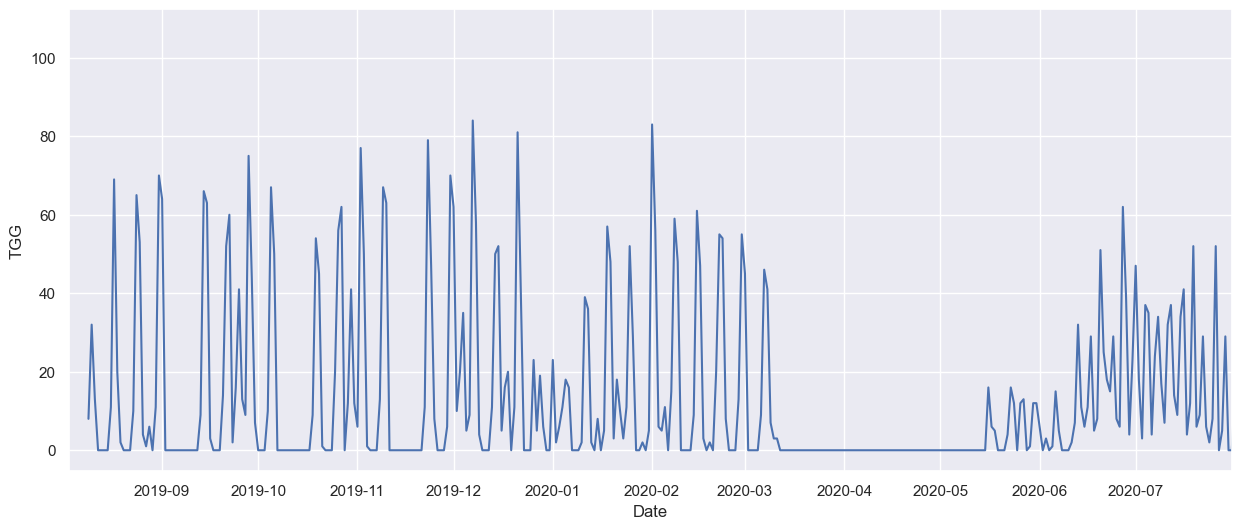

In [42]:
plt.figure(figsize = (15,6))
plt.plot(prophet_data_TGG.index, prophet_data_TGG.TGG)
plt.xlim(datetime.date(2019,8,3), datetime.date(2020,7,31))
plt.xlabel('Date')
plt.ylabel('TGG')
plt.show()

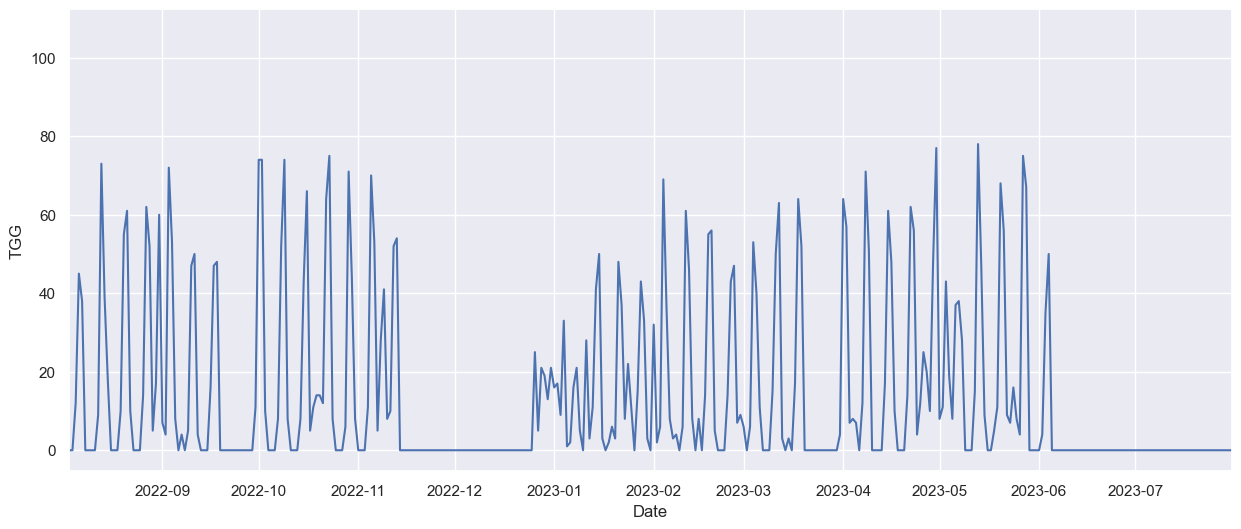

In [44]:
plt.figure(figsize = (15,6))
plt.plot(prophet_data_TGG.index, prophet_data_TGG.TGG)
plt.xlim(datetime.date(2022,8,3), datetime.date(2023,7,31))
plt.xlabel('Date')
plt.ylabel('TGG')
plt.show()

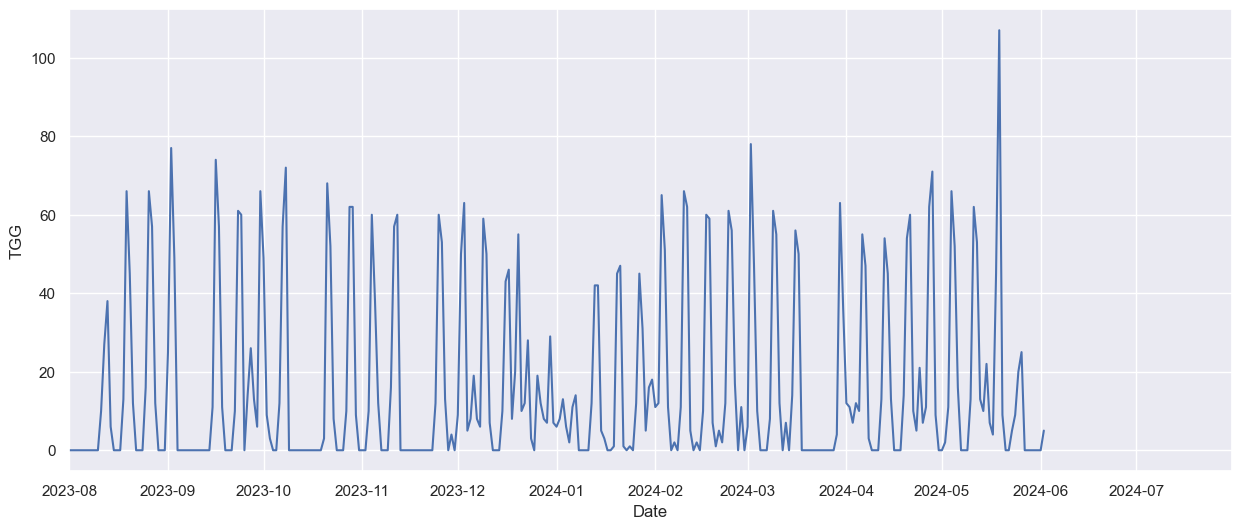

In [46]:
plt.figure(figsize = (15,6))
plt.plot(prophet_data_TGG.index, prophet_data_TGG.TGG)
plt.xlim(datetime.date(2023,8,1), datetime.date(2024,7,31))
plt.xlabel('Date')
plt.ylabel('TGG')
plt.show()

In [48]:
prophet_data_FTR = prophet_data.resample('W').sum()
print(prophet_data_FTR.shape)
prophet_data_FTR.head()

(252, 6)


Div  \
Fecha_y_Hora                                                      
2019-08-11             L1PLPLPLPLPLPLL1PLL1L1L1L1L1L1PLPLL1PLL1   
2019-08-18    BLL1LLGPLBLBLBLBLBLPLPLPLPLPLLLGL1BLPLLLGLLGL1...   
2019-08-25    PLLLGBLPLLLGPLBLBLBLBLBLPLPLPLPLLLGSABLPLLLGL1...   
2019-09-01    SAL1L1L1LLGBLL1SALLGPLBLBLBLBLBLPLPLPLPLPLPLLL...   
2019-09-08                                                    0   

                                                       HomeTeam  \
Fecha_y_Hora                                                      
2019-08-11    MonacoLiverpoolWest HamBournemouthBurnleyCryst...   
2019-08-18    Bayern MunichLyonAth BilbaoArsenalDortmundFrei...   
2019-08-25    WolvesGranadaFC KolnAston VillaLevanteNorwichA...   
2019-09-01    InterMontpellierLilleNiceSevillaM'gladbachMetz...   
2019-09-08                                                    0   

                                                       AwayTeam  TGG  \
Fecha_y_Hora                                                           
2019-08-11    LyonNorwichMan CitySheffield UnitedSouthampton...   53   
2019-08-18    HerthaAngersBarcelonaBurnleyAugsburgMainzPader...  100   
2019-08-25    Man UnitedSevillaDortmundEvertonVillarrealChel...  130   
2019-09-01    LecceLyonSt EtienneMarseilleCeltaRB LeipzigPar...  156   
2019-09-08                                                    0    0   

              AvgC>2.5  AvgC<2.5  
Fecha_y_Hora                      
2019-08-11       40.54     40.41  
2019-08-18       71.84     79.27  
2019-08-25       88.06     97.29  
2019-09-01       98.92    112.12  
2019-09-08        0.00      0.00

In [50]:
prophet_data_TGG1 = prophet_data_FTR.drop(columns=['Div', 'AvgC>2.5', 'AvgC<2.5'])
prophet_data_TGG1

HomeTeam  \
Fecha_y_Hora                                                      
2019-08-11    MonacoLiverpoolWest HamBournemouthBurnleyCryst...   
2019-08-18    Bayern MunichLyonAth BilbaoArsenalDortmundFrei...   
2019-08-25    WolvesGranadaFC KolnAston VillaLevanteNorwichA...   
2019-09-01    InterMontpellierLilleNiceSevillaM'gladbachMetz...   
2019-09-08                                                    0   
...                                                         ...   
2024-05-05    GenoaBarcelonaChelseaToulouseHoffenheimTorinoG...   
2024-05-12    SalernitanaUdineseLilleCrystal PalaceAugsburgF...   
2024-05-19    LecceFiorentinaBarcelonaAston VillaOsasunaTott...   
2024-05-26    SalernitanaBolognaCagliariGenoaGironaOsasunaSo...   
2024-06-02                                             Atalanta   

                                                       AwayTeam  TGG  
Fecha_y_Hora                                                          
2019-08-11    LyonNorwichMan CitySheffield UnitedSouthampton...   53  
2019-08-18    HerthaAngersBarcelonaBurnleyAugsburgMainzPader...  100  
2019-08-25    Man UnitedSevillaDortmundEvertonVillarrealChel...  130  
2019-09-01    LecceLyonSt EtienneMarseilleCeltaRB LeipzigPar...  156  
2019-09-08                                                    0    0  
...                                                         ...  ...  
2024-05-05    CagliariValenciaTottenhamMontpellierRB Leipzig...  140  
2024-05-12    AtalantaNapoliLyonMan UnitedStuttgartInterGiro...  144  
2024-05-19    UdineseMonzaSociedadLiverpoolMallorcaMan CityA...  208  
2024-05-26    VeronaJuventusFiorentinaBolognaGranadaVillarre...   68  
2024-06-02                                           Fiorentina    5  

[252 rows x 3 columns]

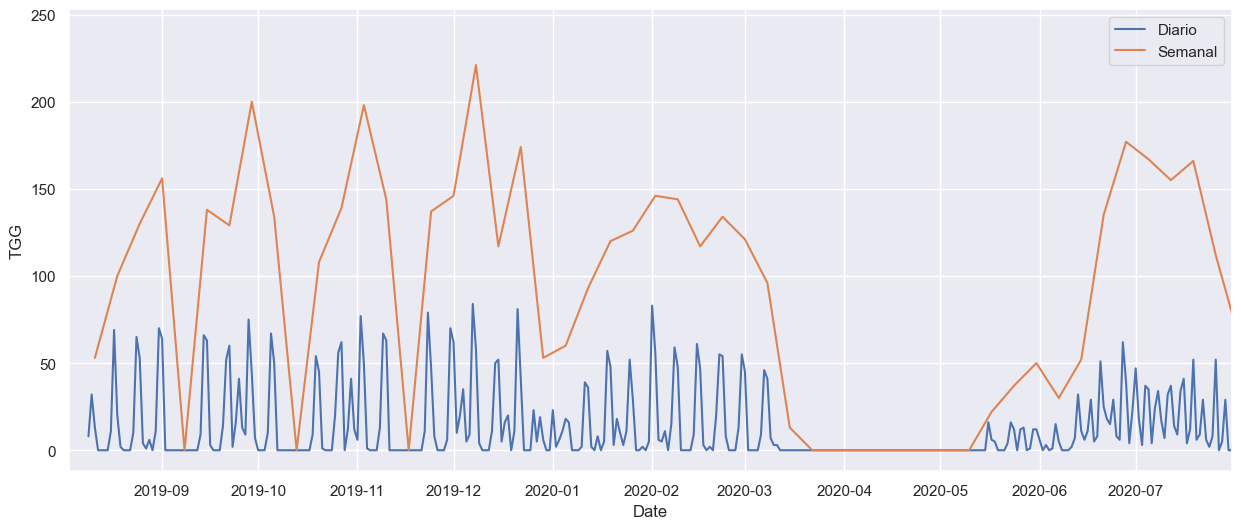

In [52]:
plt.figure(figsize = (15,6))
plt.plot(prophet_data_TGG.index, prophet_data_TGG.TGG, label = 'Diario')
plt.plot(prophet_data_TGG1.index, prophet_data_TGG1.TGG, label = 'Semanal')
plt.xlim(datetime.date(2019,8,3), datetime.date(2020,7,31))
plt.legend()
plt.xlabel('Date')
plt.ylabel('TGG')
plt.show()

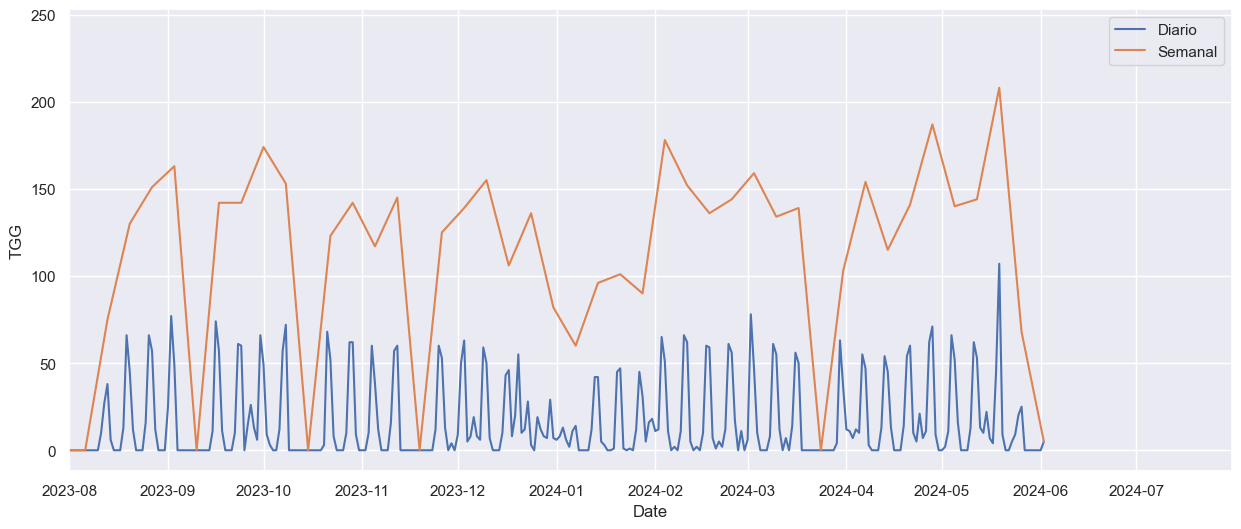

In [54]:
plt.figure(figsize = (15,6))
plt.plot(prophet_data_TGG.index, prophet_data_TGG.TGG, label = 'Diario')
plt.plot(prophet_data_TGG1.index, prophet_data_TGG1.TGG, label = 'Semanal')
plt.xlim(datetime.date(2023,8,1), datetime.date(2024,7,31))
plt.legend()
plt.xlabel('Date')
plt.ylabel('TGG')
plt.show()

In [56]:
from prophet import Prophet

In [58]:
prophet_data_TGG

HomeTeam  \
Fecha_y_Hora                                                      
2019-08-09                                      MonacoLiverpool   
2019-08-10    West HamBournemouthBurnleyCrystal PalaceWatfor...   
2019-08-11    LilleLeicesterNewcastleStrasbourgMan UnitedPar...   
2019-08-12                                                    0   
2019-08-13                                                    0   
...                                                         ...   
2024-05-29                                                    0   
2024-05-30                                                    0   
2024-05-31                                                    0   
2024-06-01                                                    0   
2024-06-02                                             Atalanta   

                                                       AwayTeam  TGG  
Fecha_y_Hora                                                          
2019-08-09                                          LyonNorwich    8  
2019-08-10    Man CitySheffield UnitedSouthamptonEvertonBrig...   32  
2019-08-11                  NantesWolvesArsenalMetzChelseaNimes   13  
2019-08-12                                                    0    0  
2019-08-13                                                    0    0  
...                                                         ...  ...  
2024-05-29                                                    0    0  
2024-05-30                                                    0    0  
2024-05-31                                                    0    0  
2024-06-01                                                    0    0  
2024-06-02                                           Fiorentina    5  

[1760 rows x 3 columns]

In [60]:
df = prophet_data_TGG.reset_index()
df.rename(columns = {'Fecha_y_Hora':'ds', 'TGG':'y'}, inplace = True)
df

ds                                           HomeTeam  \
0    2019-08-09                                    MonacoLiverpool   
1    2019-08-10  West HamBournemouthBurnleyCrystal PalaceWatfor...   
2    2019-08-11  LilleLeicesterNewcastleStrasbourgMan UnitedPar...   
3    2019-08-12                                                  0   
4    2019-08-13                                                  0   
...         ...                                                ...   
1755 2024-05-29                                                  0   
1756 2024-05-30                                                  0   
1757 2024-05-31                                                  0   
1758 2024-06-01                                                  0   
1759 2024-06-02                                           Atalanta   

                                               AwayTeam   y  
0                                           LyonNorwich   8  
1     Man CitySheffield UnitedSouthamptonEvertonBrig...  32  
2                   NantesWolvesArsenalMetzChelseaNimes  13  
3                                                     0   0  
4                                                     0   0  
...                                                 ...  ..  
1755                                                  0   0  
1756                                                  0   0  
1757                                                  0   0  
1758                                                  0   0  
1759                                         Fiorentina   5  

[1760 rows x 4 columns]

In [62]:
#We fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then you call its fit method and pass in the historical dataframe. Fitting should take 1-5 seconds.
m = Prophet()
m.fit(df)

04:17:49 - cmdstanpy - INFO - Chain [1] start processing
04:17:49 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
2120 2025-05-29
2121 2025-05-30
2122 2025-05-31
2123 2025-06-01
2124 2025-06-02

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


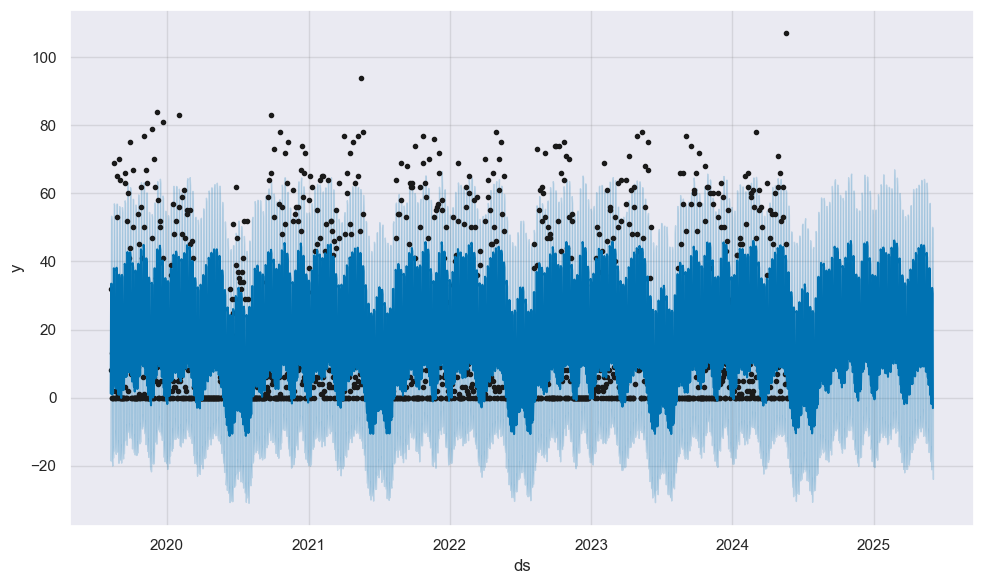

In [66]:
forecast = m.predict(future)
fig1 = m.plot(forecast)

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

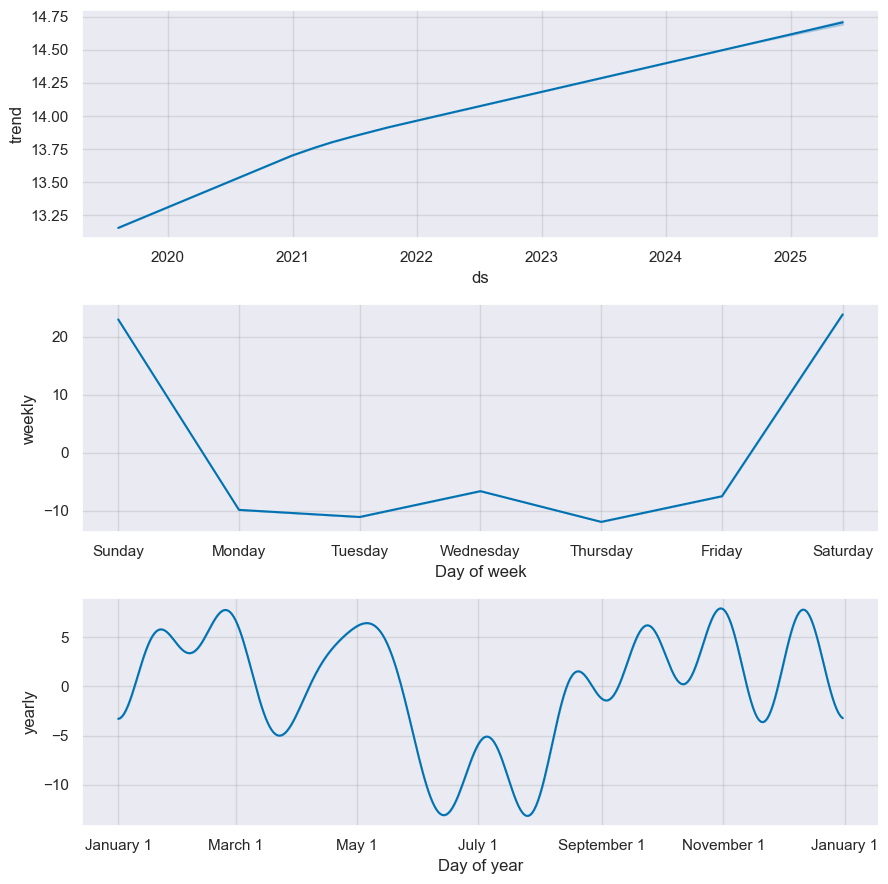

In [50]:
fig2 = m.plot_components(forecast)

In [51]:
# Calcular la media de 'yhat' para el año 2025
media_prediccion_2025 = forecast[forecast['ds'].dt.year == 2025]['yhat'].mean()
print(f"Media de 'yhat' para las predicciones del año 2025: {media_prediccion_2025}")

Media de 'yhat' para las predicciones del año 2025: 16.929050749250464


In [52]:
prophet_data

Div       HomeTeam       AwayTeam  TGG  AvgC>2.5  AvgC<2.5
Fecha_y_Hora                                                                  
2023-08-18 19:30:00  BL  Werder Bremen  Bayern Munich    4      1.34      3.29
2023-08-19 14:30:00  BL       Augsburg     M'gladbach    8      1.62      2.31
2023-08-19 14:30:00  BL     Hoffenheim       Freiburg    3      1.65      2.26
2023-08-19 14:30:00  BL     Leverkusen     RB Leipzig    5      1.68      2.19
2023-08-19 14:30:00  BL      Stuttgart         Bochum    5      1.64      2.26
...                  ..            ...            ...  ...       ...       ...
2020-08-02 17:00:00  SA           Spal     Fiorentina    4      1.55      2.45
2020-08-02 19:45:00  SA        Bologna         Torino    2      1.35      3.14
2020-08-02 19:45:00  SA          Genoa         Verona    3      1.50      2.55
2020-08-02 19:45:00  SA          Lecce          Parma    7      1.32      3.34
2020-08-02 19:45:00  SA       Sassuolo        Udinese    1      1.38      2.99

[8955 rows x 6 columns]

02:05:19 - cmdstanpy - INFO - Chain [1] start processing
02:05:19 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


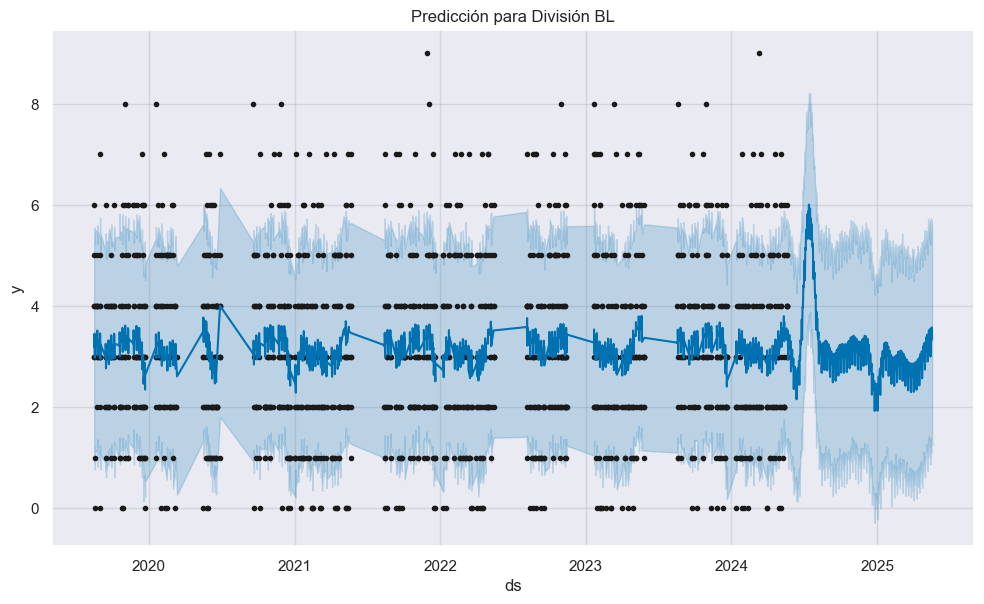

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

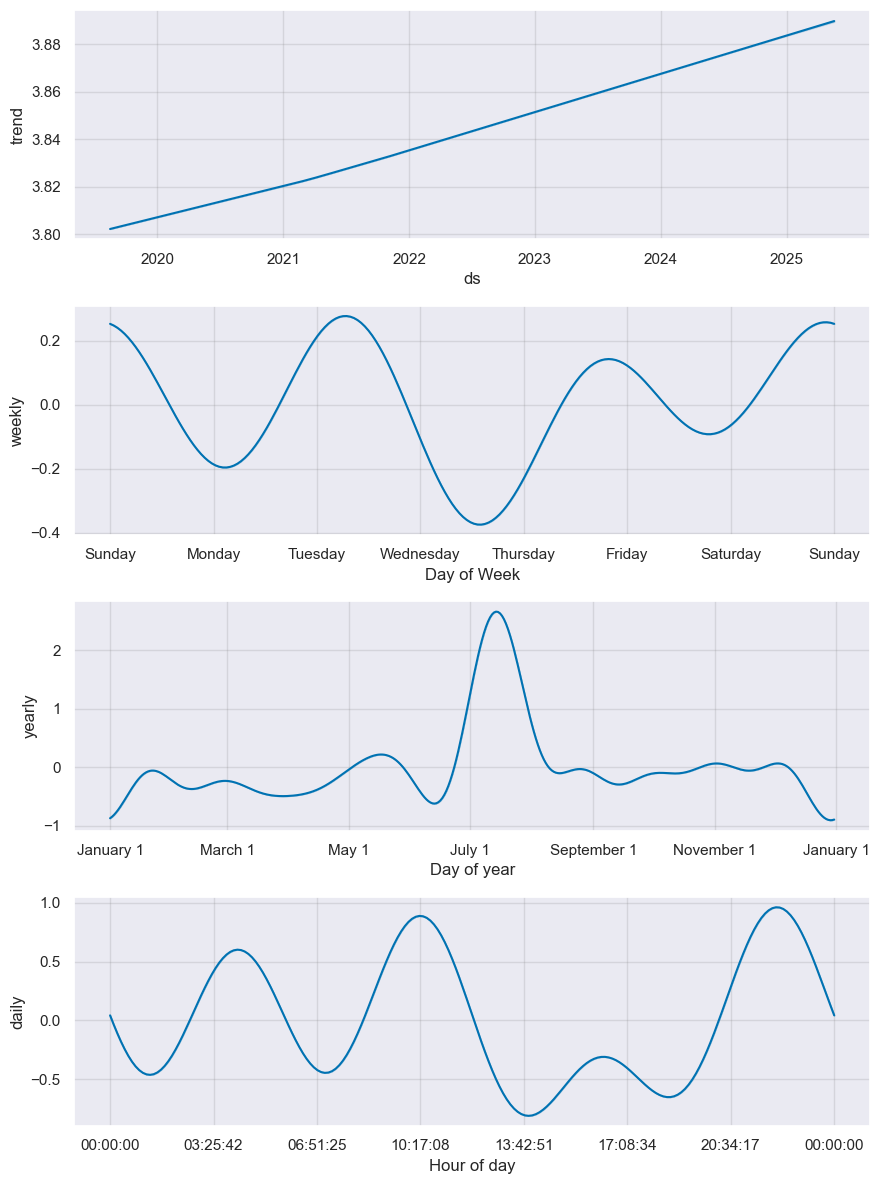

02:05:21 - cmdstanpy - INFO - Chain [1] start processing
02:05:21 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


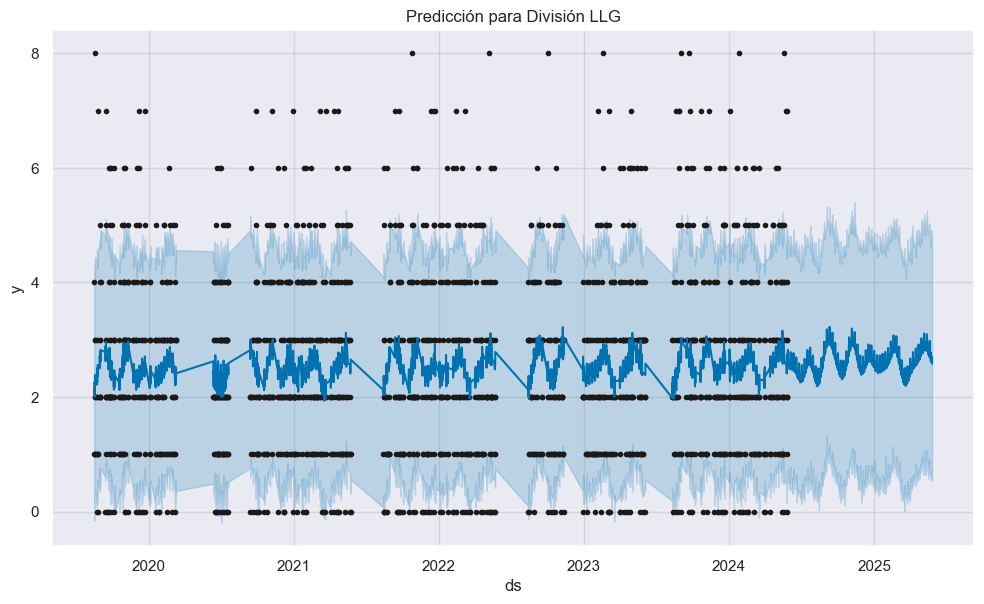

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

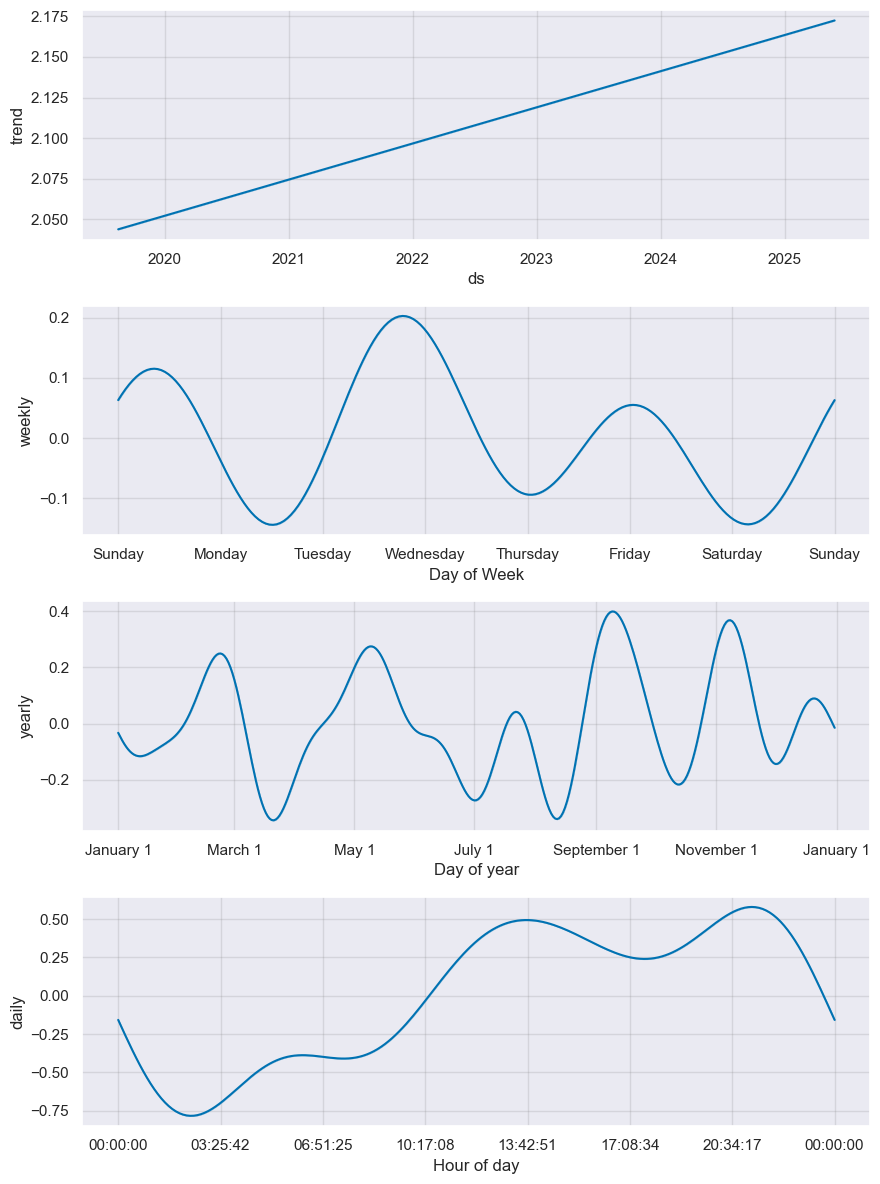

02:05:23 - cmdstanpy - INFO - Chain [1] start processing
02:05:23 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


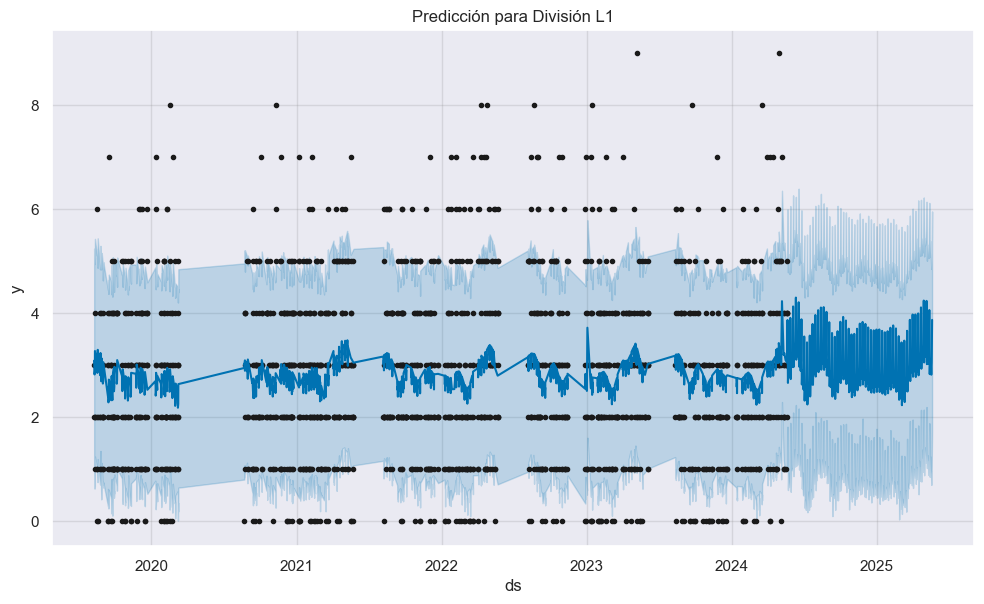

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

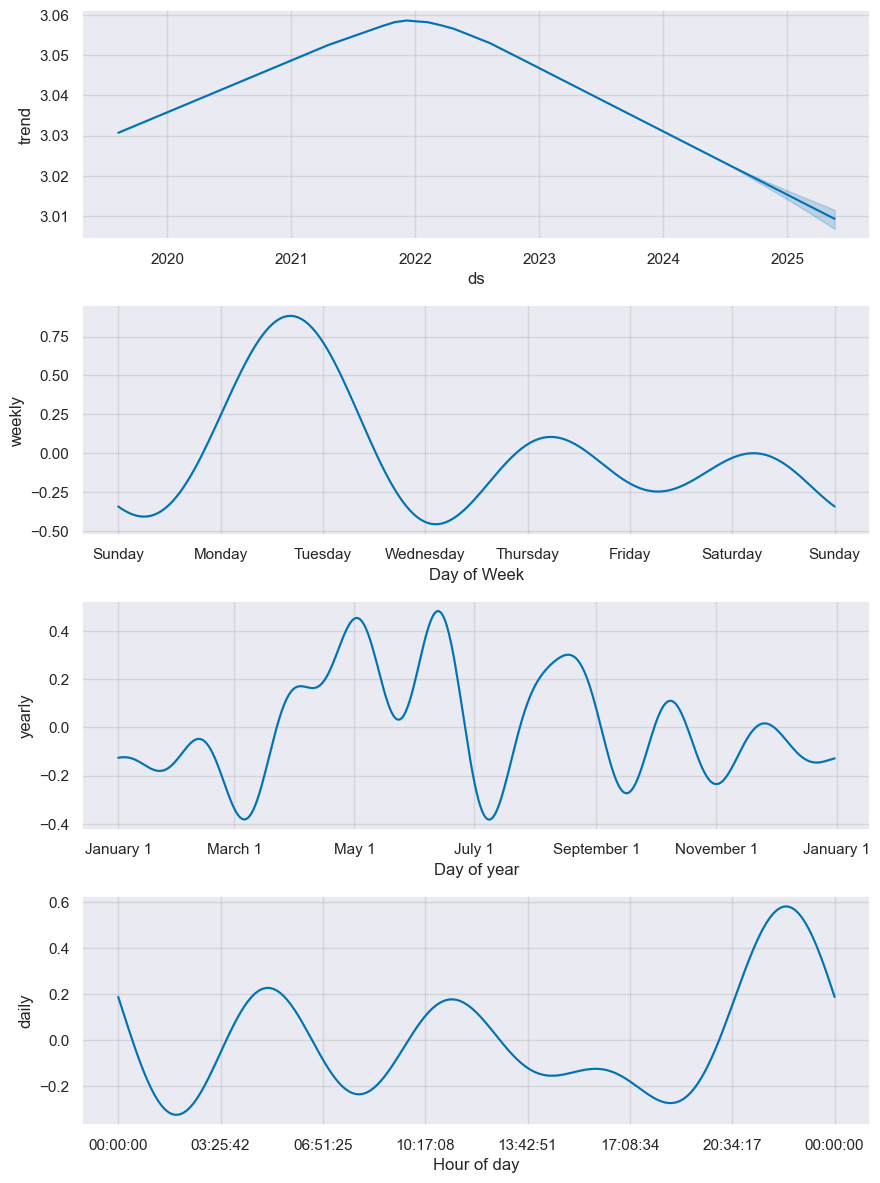

02:05:25 - cmdstanpy - INFO - Chain [1] start processing
02:05:25 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


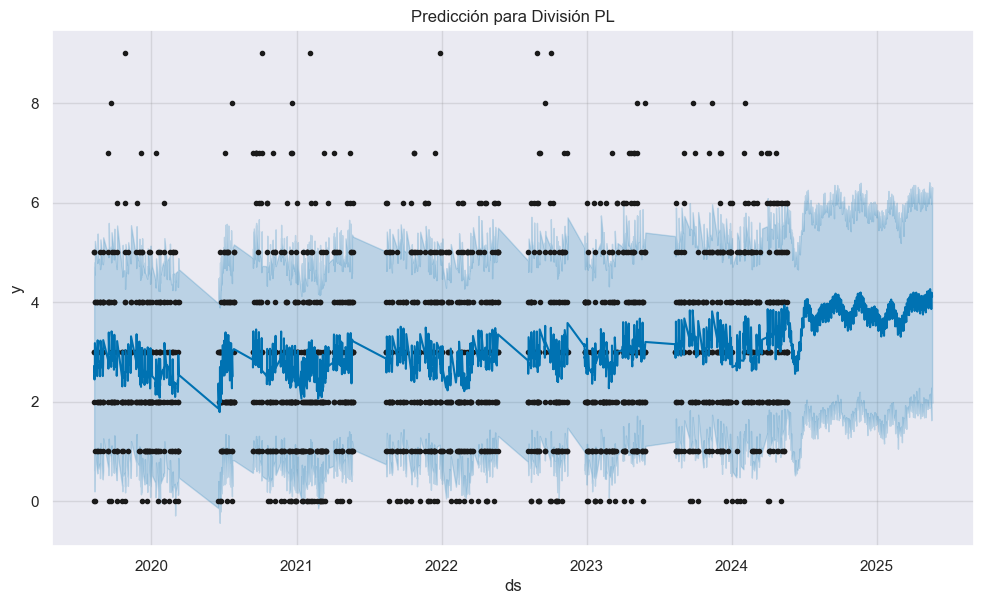

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

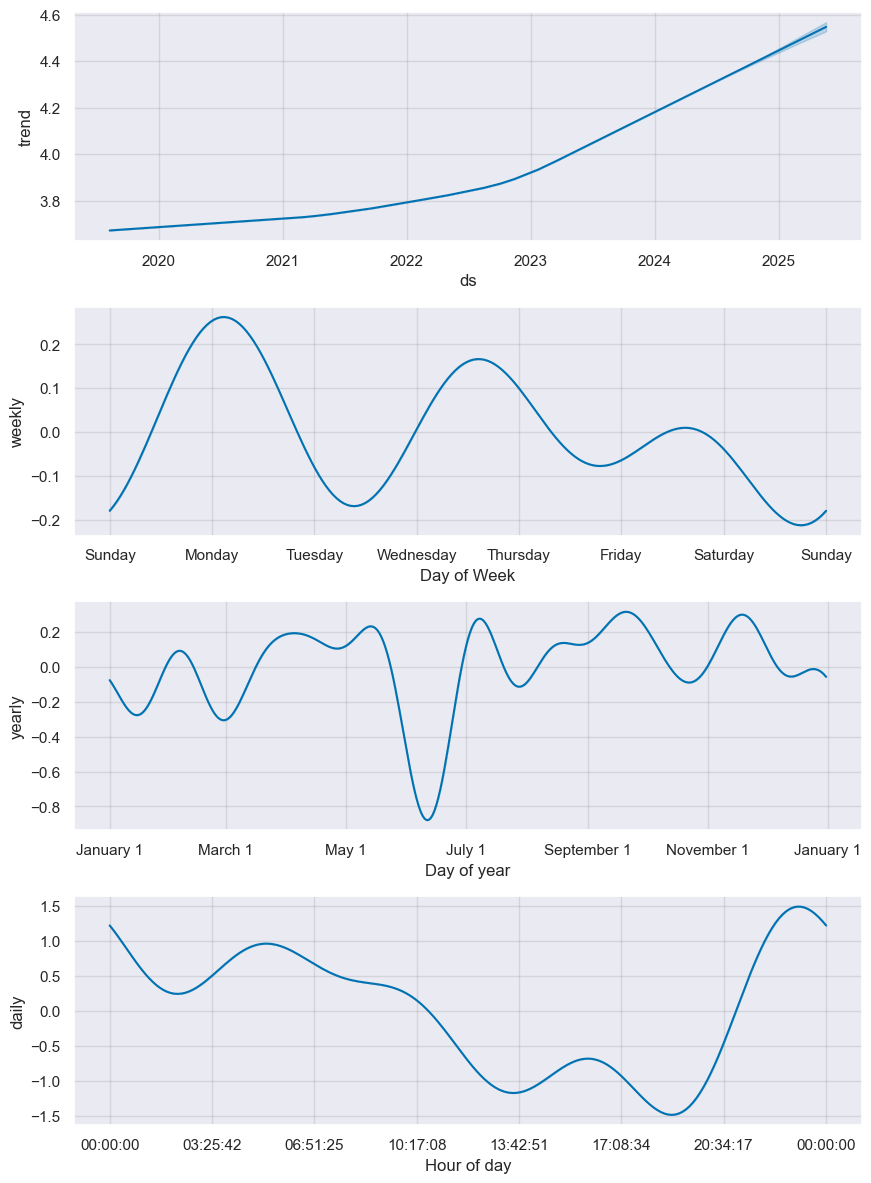

02:05:26 - cmdstanpy - INFO - Chain [1] start processing
02:05:27 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


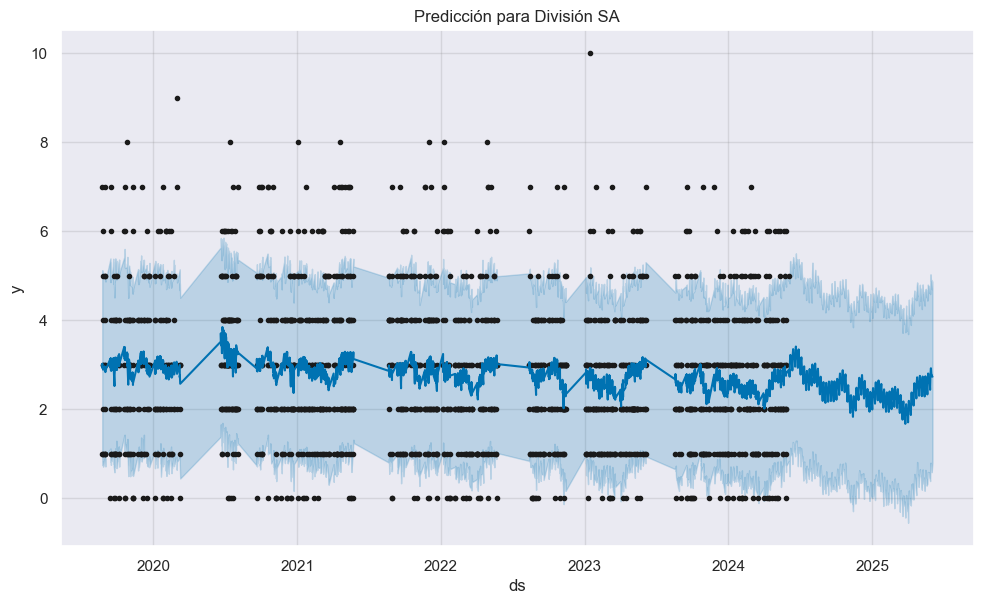

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

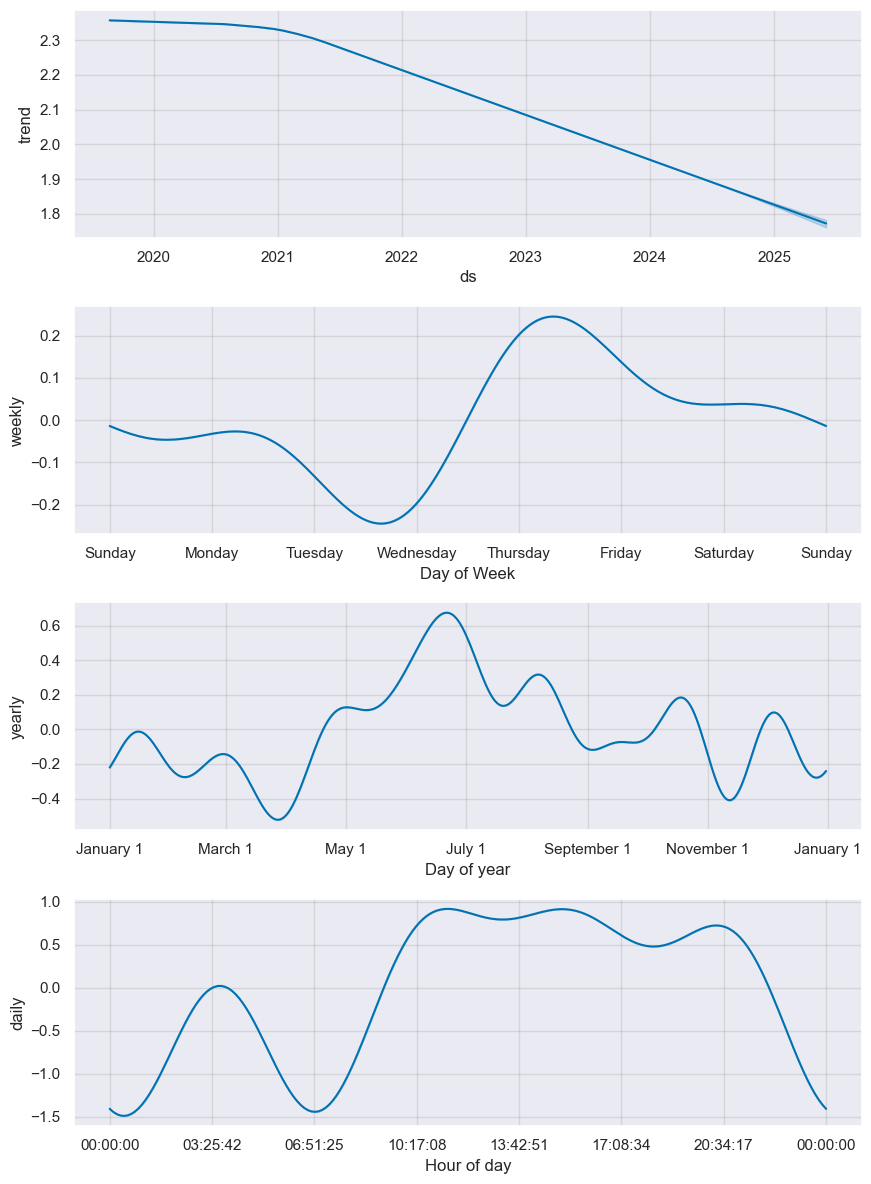

In [53]:
# Obtener las categorías únicas de 'Div'
categorias_div = prophet_data['Div'].unique()

# Iterar sobre cada categoría y ajustar un modelo Prophet
for categoria in categorias_div:
    # Filtrar el DataFrame para incluir solo la categoría actual de 'Div'
    categoria_data = prophet_data[prophet_data['Div'] == categoria]
    
    # Preparar los datos para Prophet
    categoria_data = categoria_data[['TGG']].reset_index()
    categoria_data.columns = ['ds', 'y']
    
    # Inicializar y ajustar el modelo
    m = Prophet()
    m.fit(categoria_data)
    
    # Crear un DataFrame para predicciones futuras
    future = m.make_future_dataframe(periods=365)  # Cambia el número de días según sea necesario
    
    # Hacer predicciones
    forecast = m.predict(future)
    
    # Graficar los resultados y componentes
    fig1 = m.plot(forecast)
    plt.title(f'Predicción para División {categoria}')
    plt.show()
    
    fig2 = m.plot_components(forecast)
    plt.show()

02:05:29 - cmdstanpy - INFO - Chain [1] start processing
02:05:29 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Media de 'yhat' para las predicciones del año 2025 para el equipo Bayern Munich: 3.3880191206355468


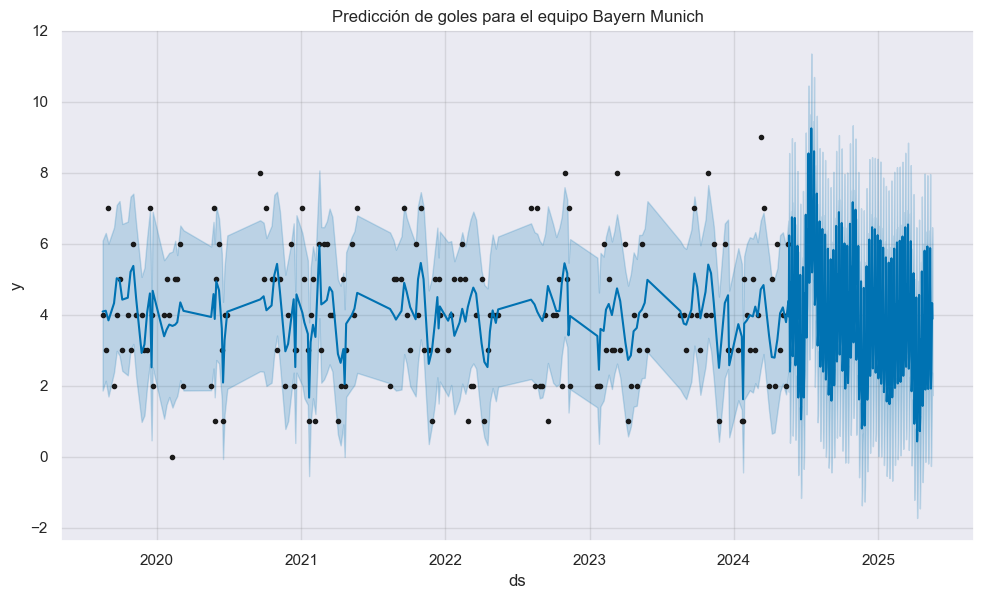

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

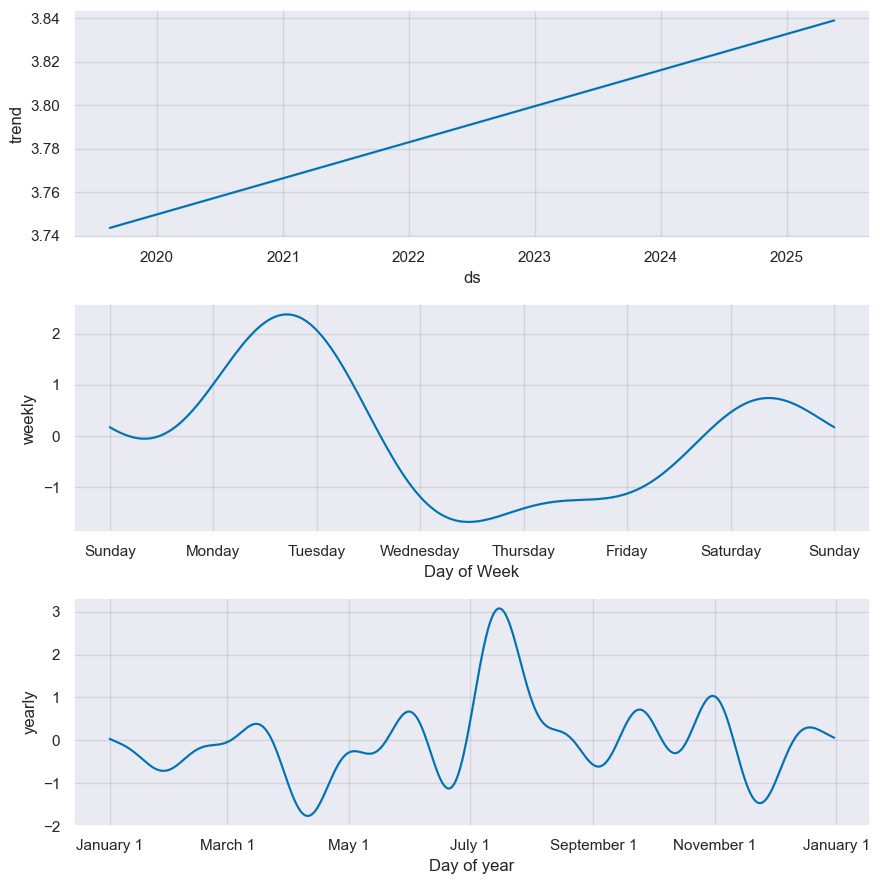

02:05:30 - cmdstanpy - INFO - Chain [1] start processing
02:05:30 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Media de 'yhat' para las predicciones del año 2025 para el equipo Sassuolo: 2.964143884193462


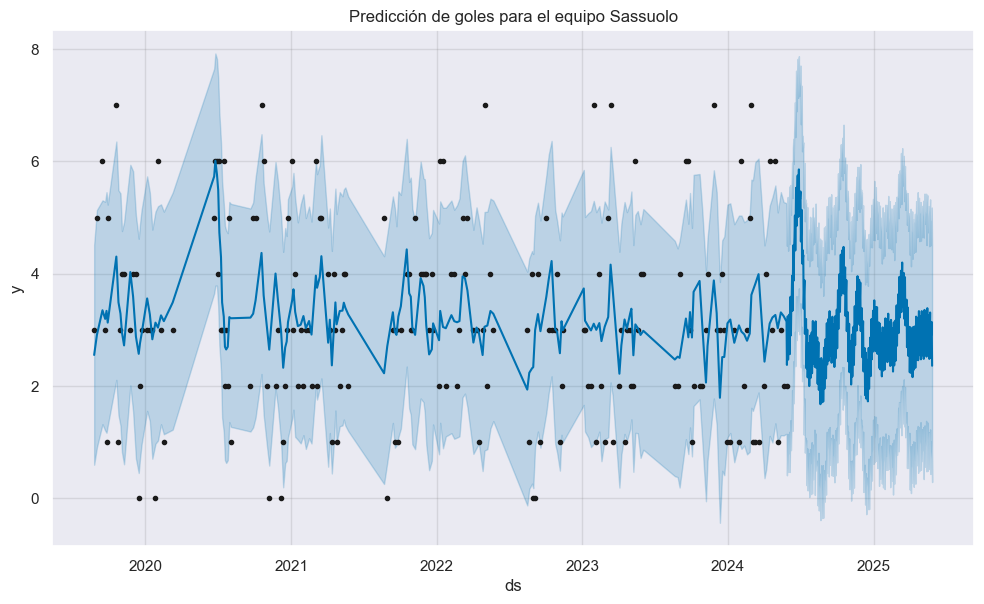

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

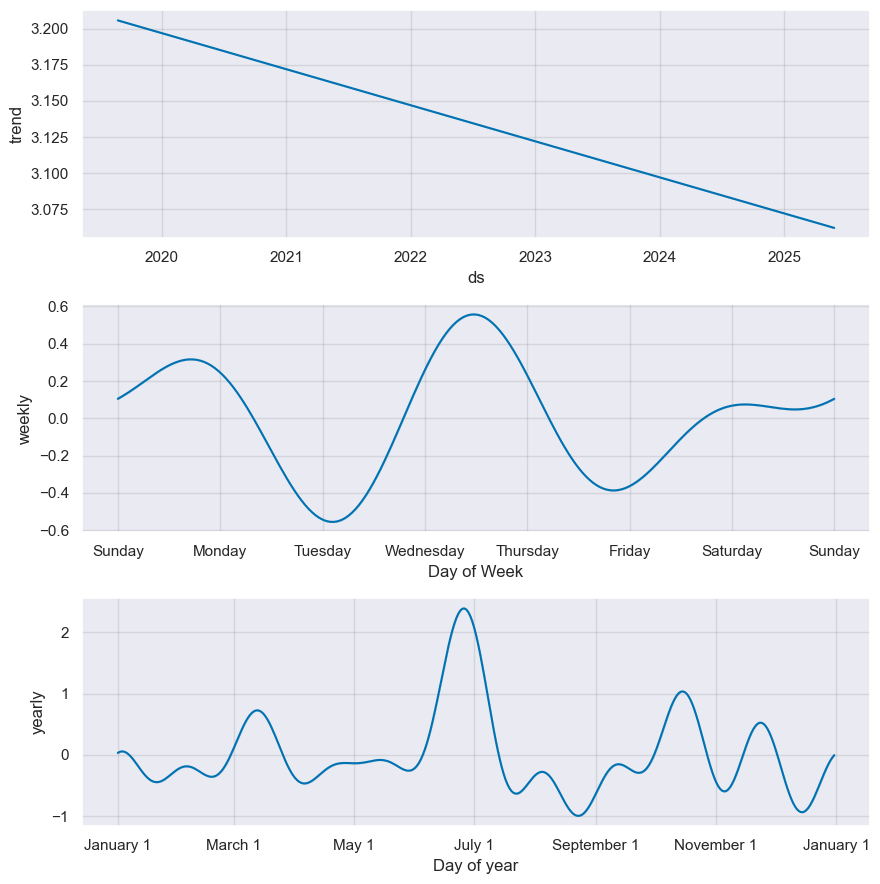

02:05:31 - cmdstanpy - INFO - Chain [1] start processing
02:05:32 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Media de 'yhat' para las predicciones del año 2025 para el equipo Man City: 3.432503121031809


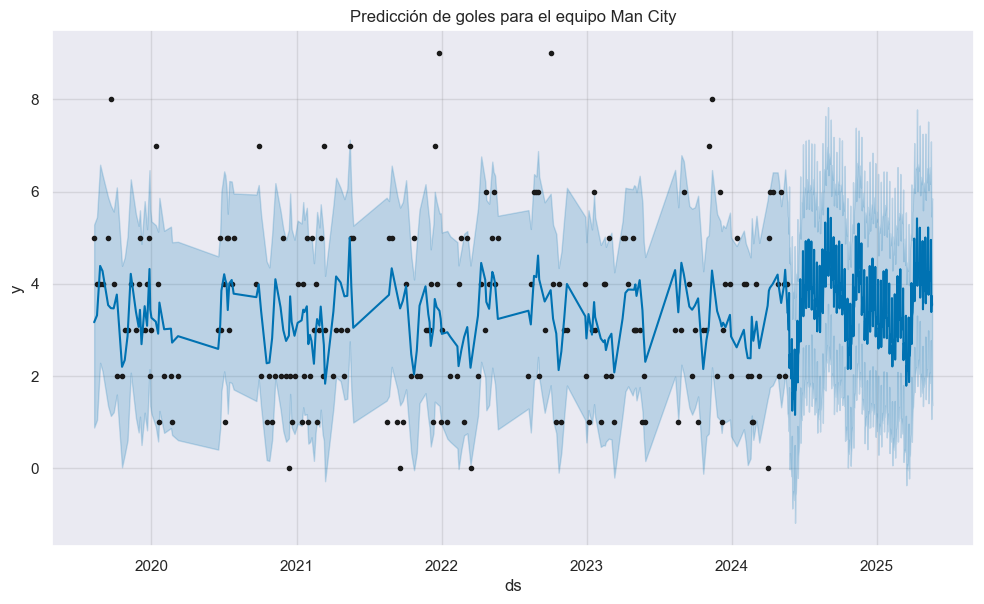

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

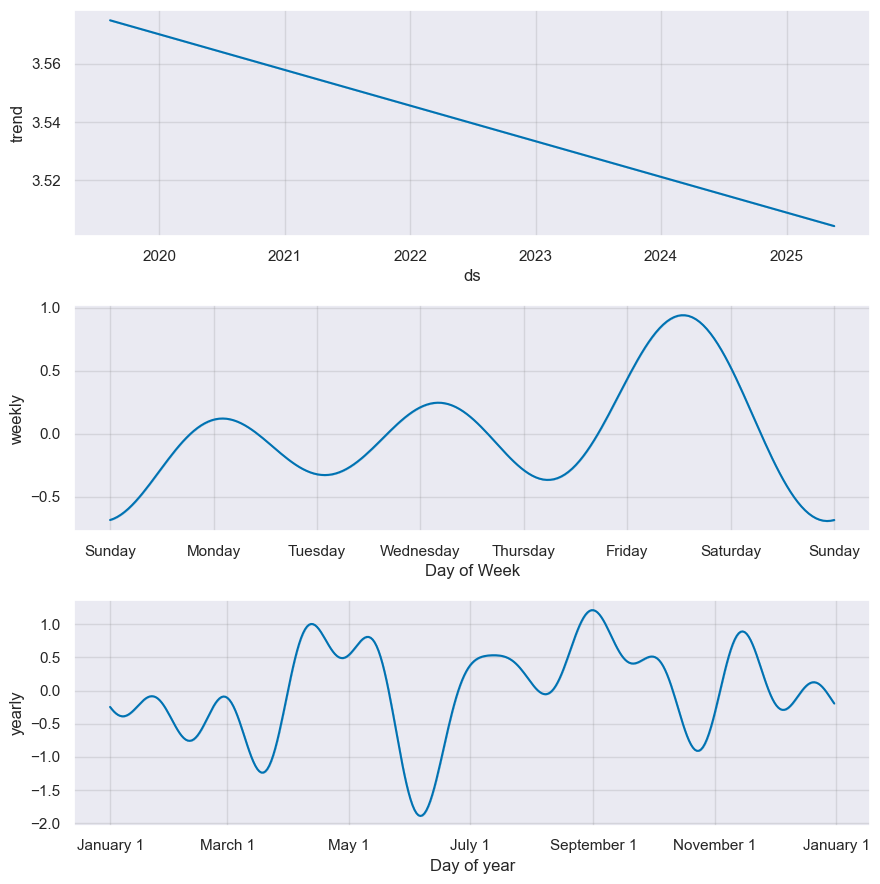

02:05:33 - cmdstanpy - INFO - Chain [1] start processing
02:05:33 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Media de 'yhat' para las predicciones del año 2025 para el equipo Dortmund: 3.3238232371220535


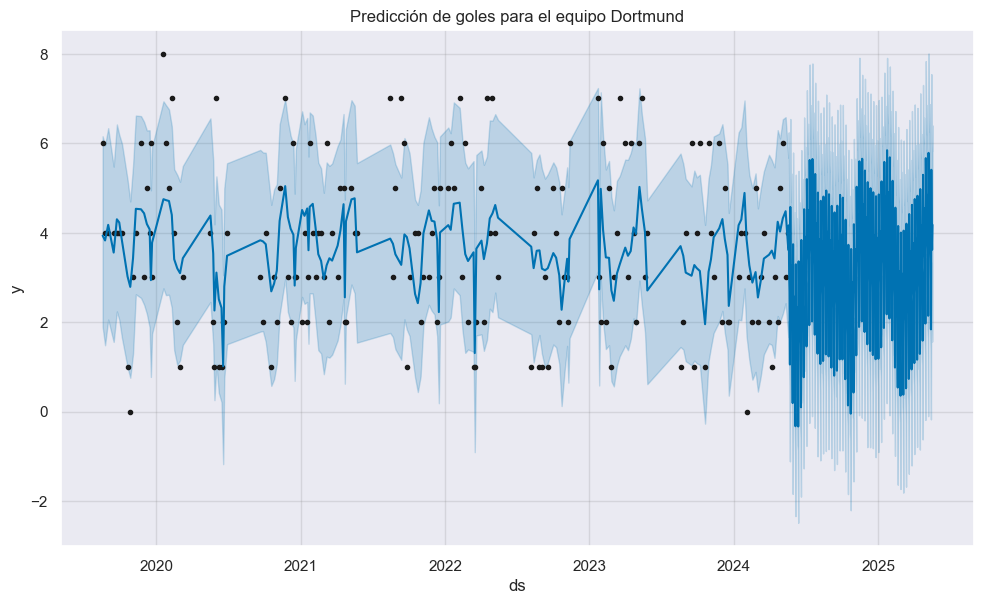

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

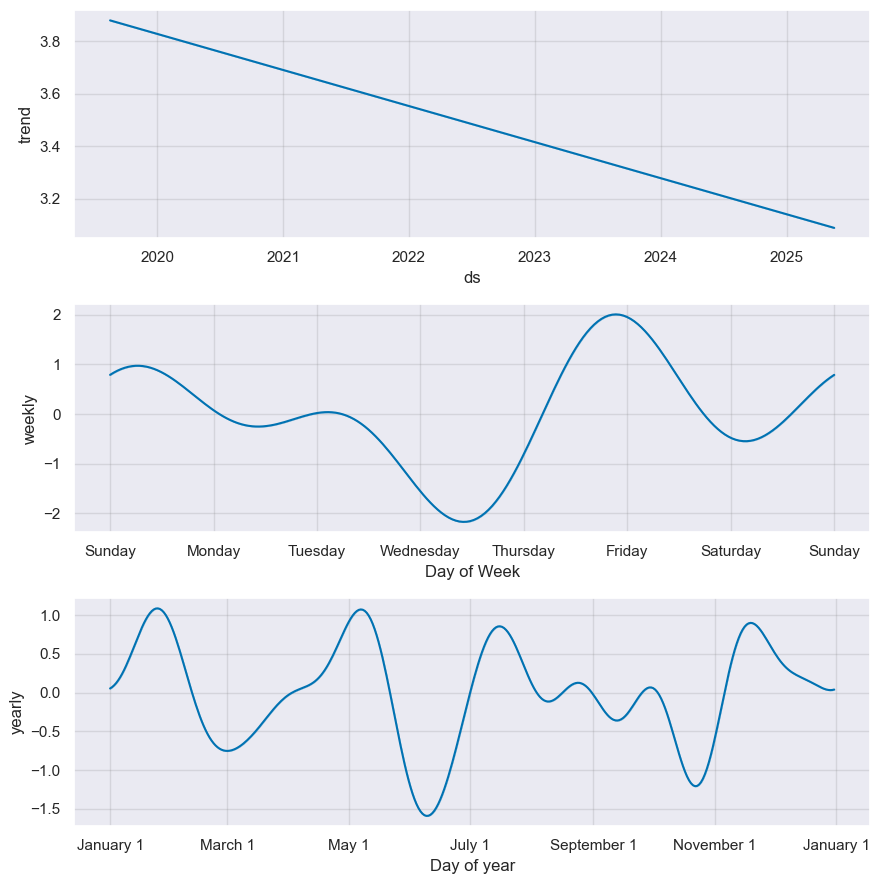

02:05:34 - cmdstanpy - INFO - Chain [1] start processing
02:05:34 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Media de 'yhat' para las predicciones del año 2025 para el equipo Tottenham: 3.4168000720271636


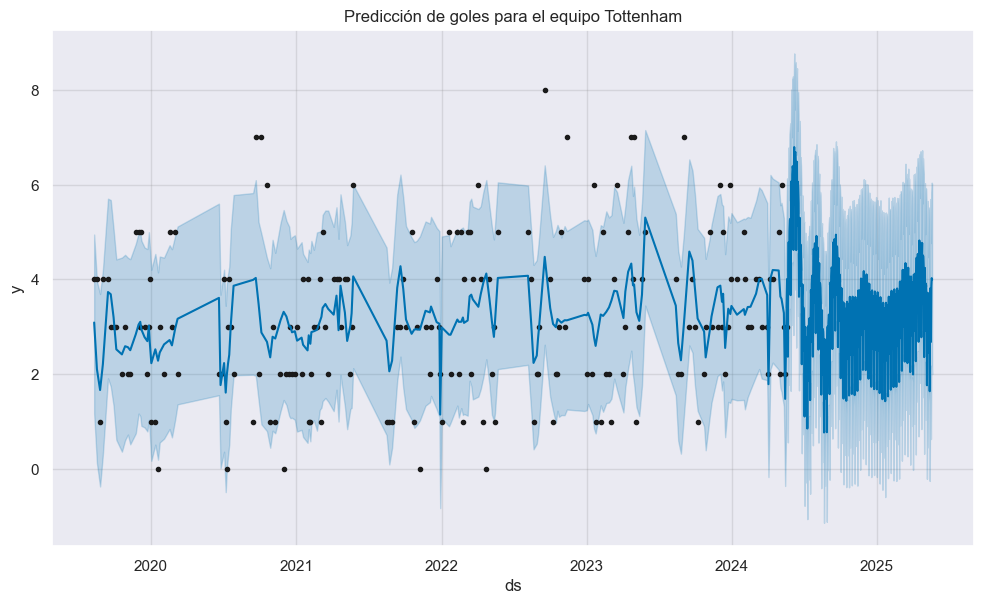

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

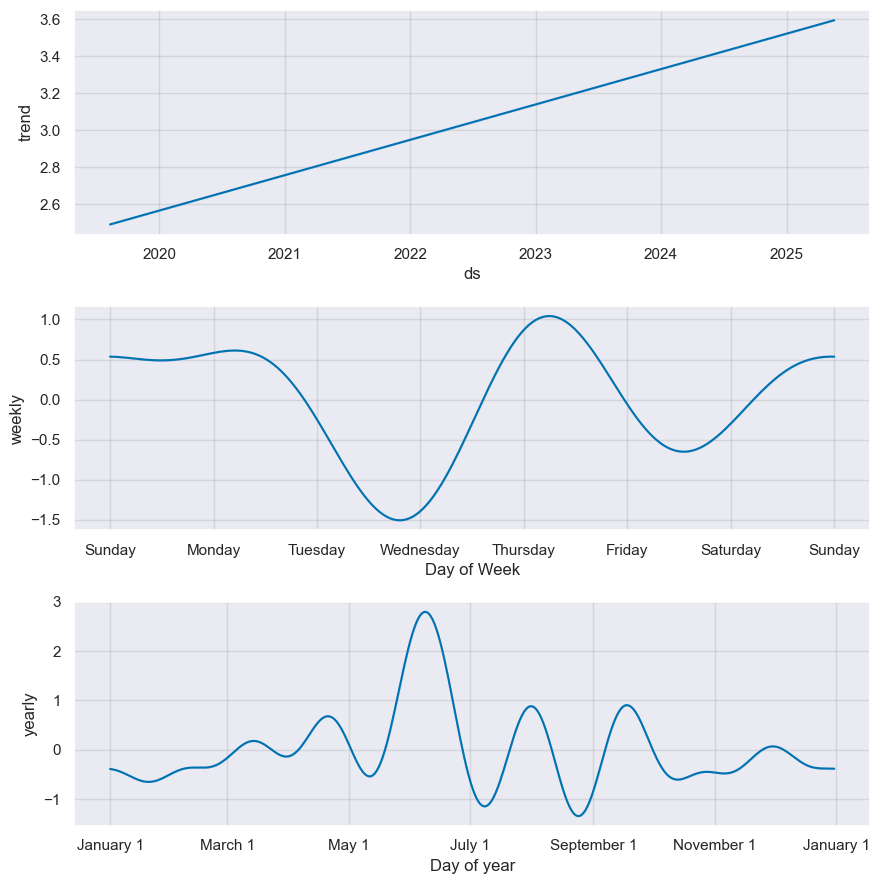

02:05:35 - cmdstanpy - INFO - Chain [1] start processing
02:05:36 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Media de 'yhat' para las predicciones del año 2025 para el equipo Liverpool: 3.1903247994774424


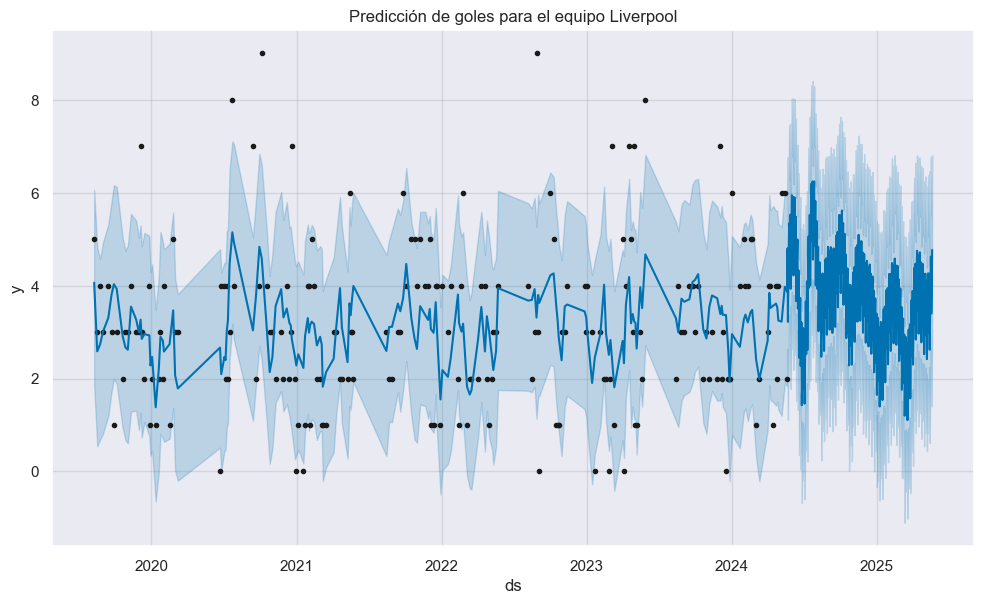

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

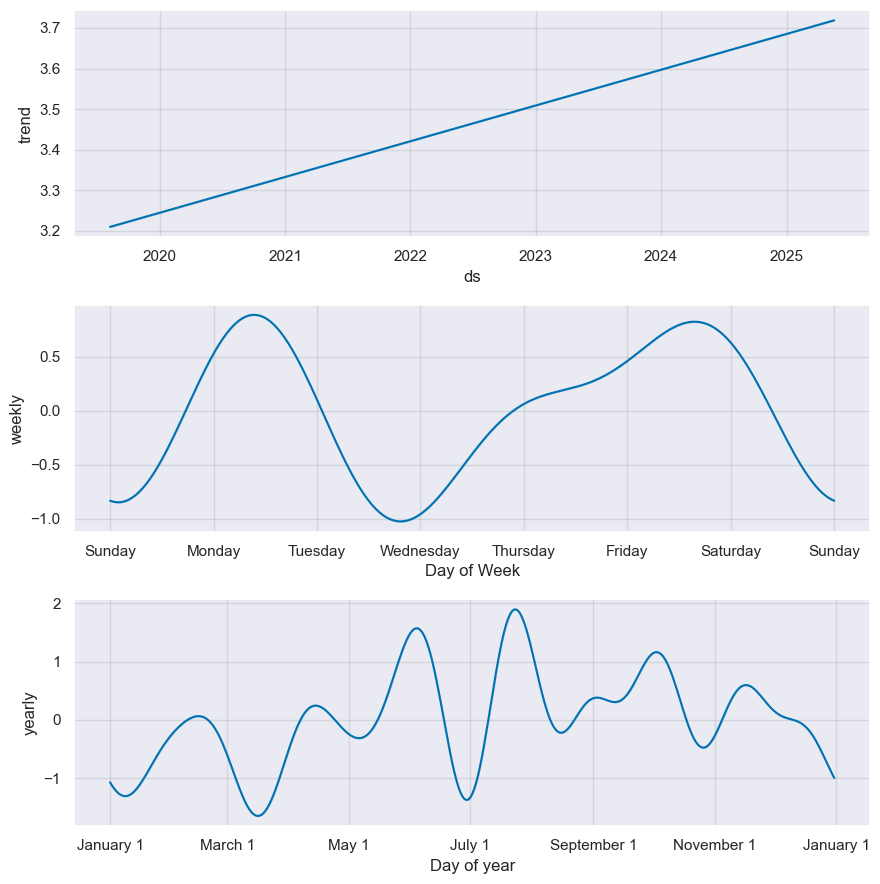

02:05:37 - cmdstanpy - INFO - Chain [1] start processing
02:05:37 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Media de 'yhat' para las predicciones del año 2025 para el equipo Atalanta: 2.545992718220613


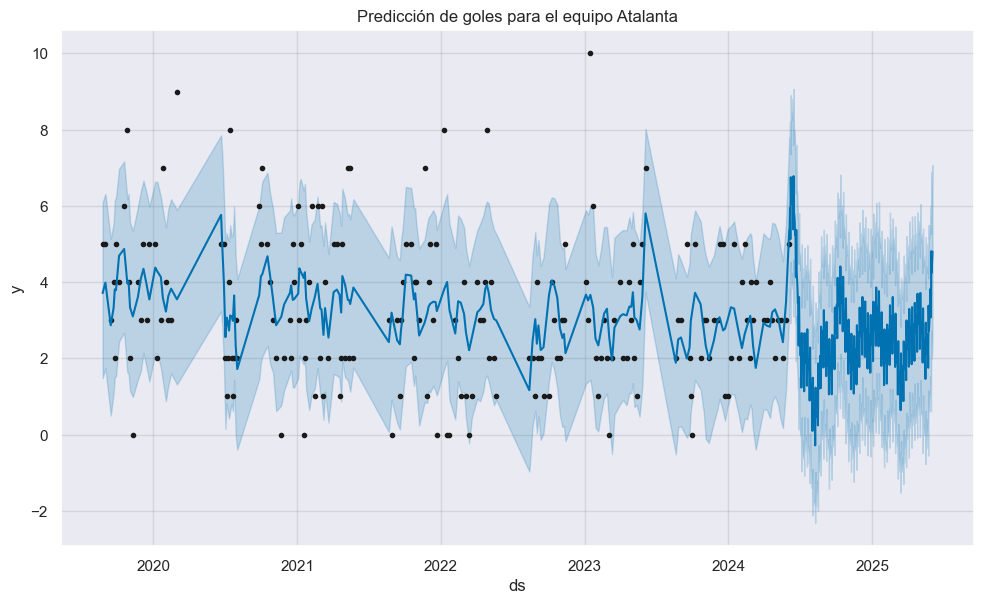

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

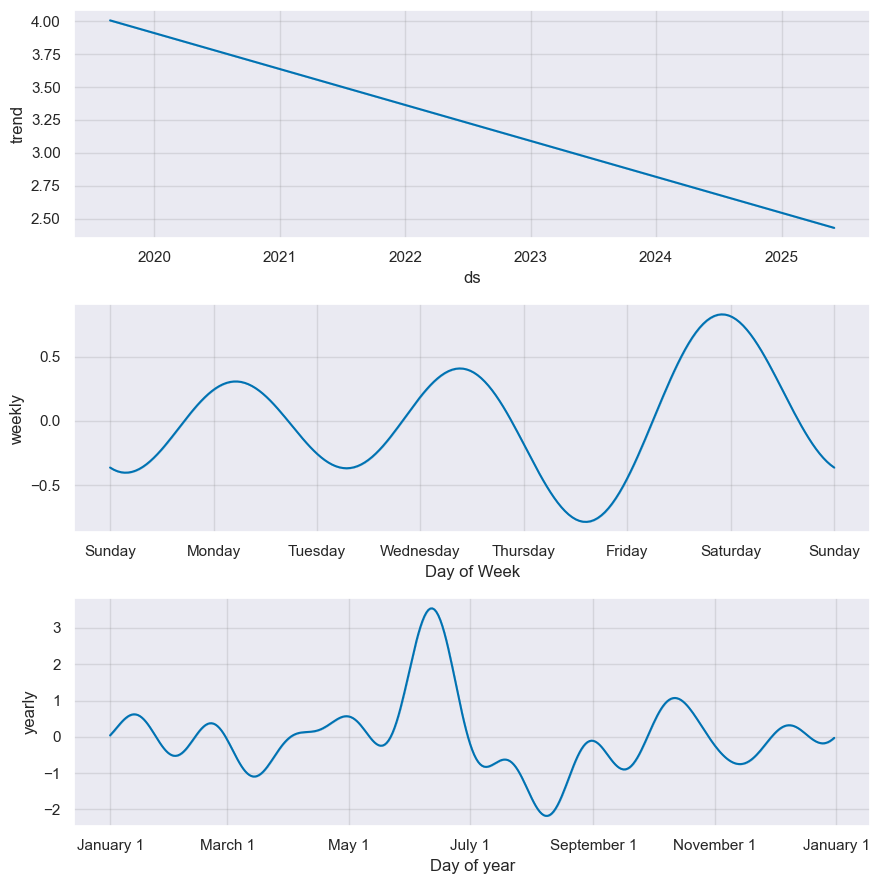

02:05:38 - cmdstanpy - INFO - Chain [1] start processing
02:05:38 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Media de 'yhat' para las predicciones del año 2025 para el equipo Hoffenheim: 3.8079088067147167


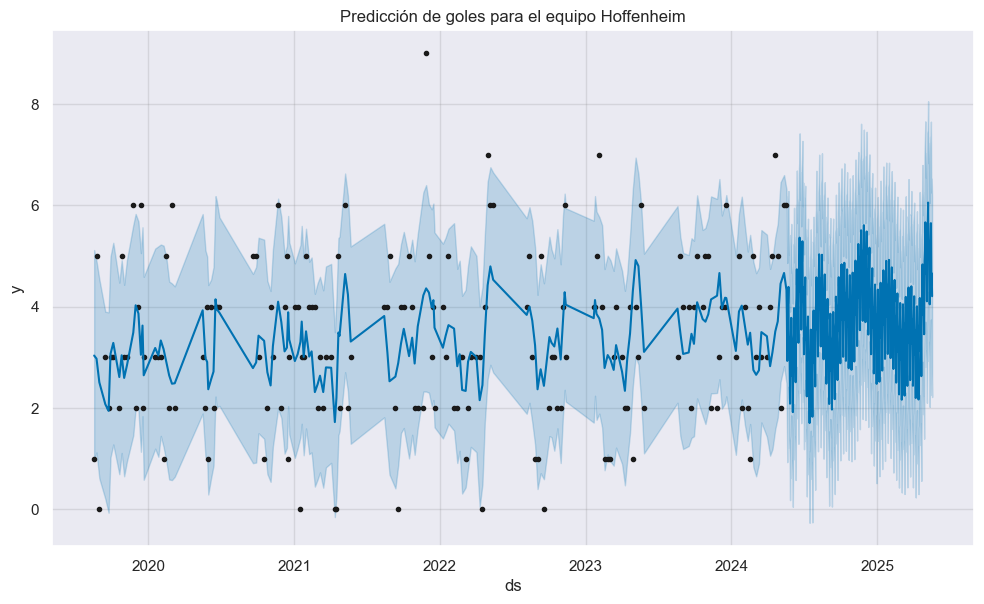

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

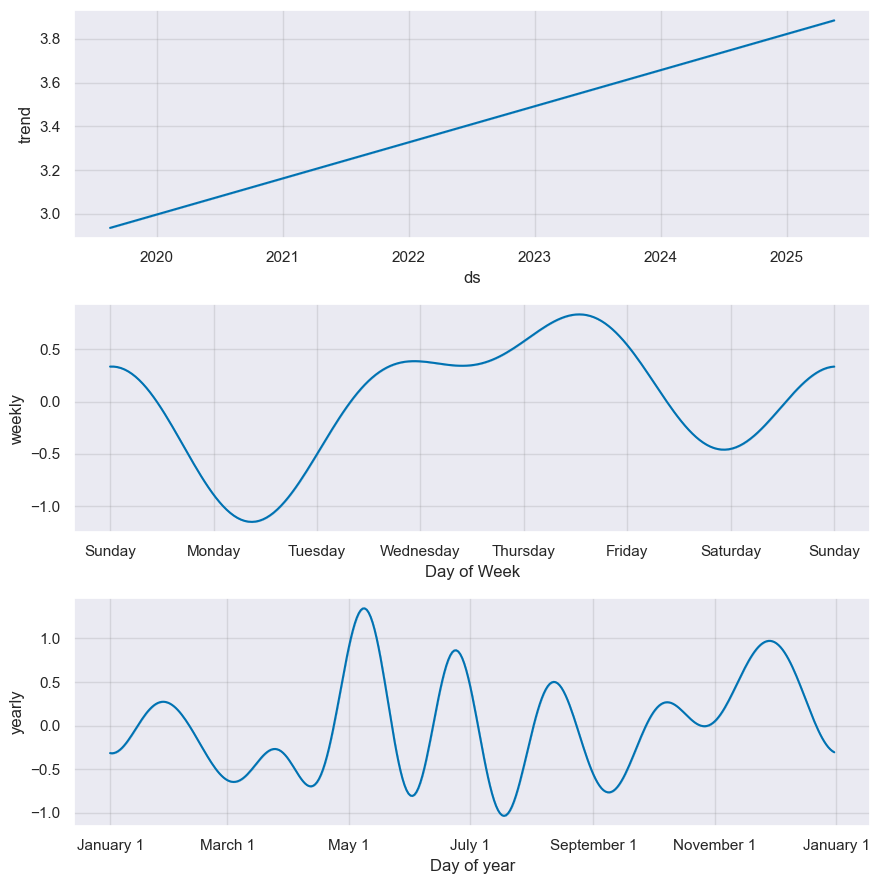

02:05:39 - cmdstanpy - INFO - Chain [1] start processing
02:05:39 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Media de 'yhat' para las predicciones del año 2025 para el equipo M'gladbach: 3.1839552518432157


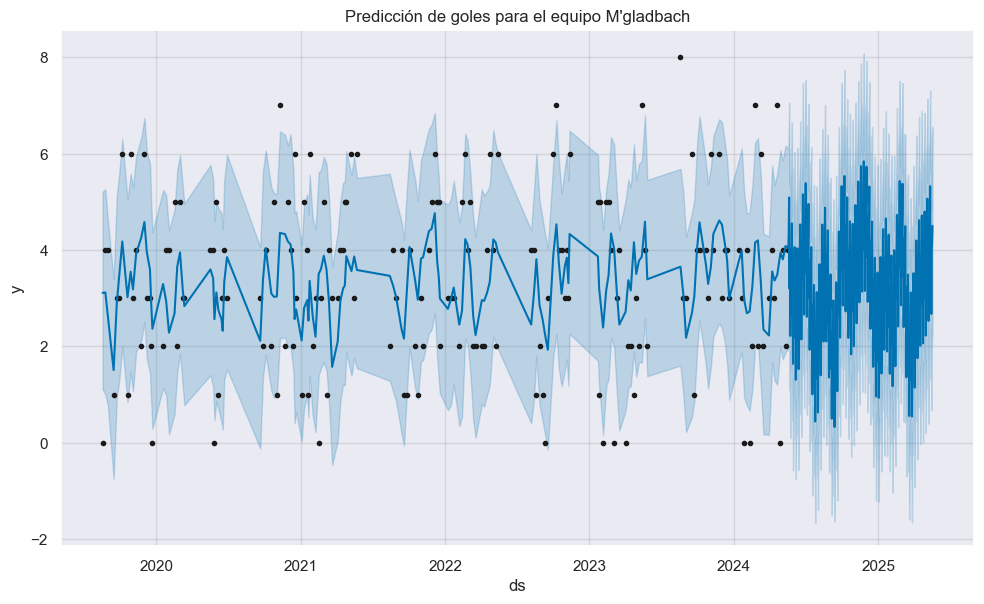

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

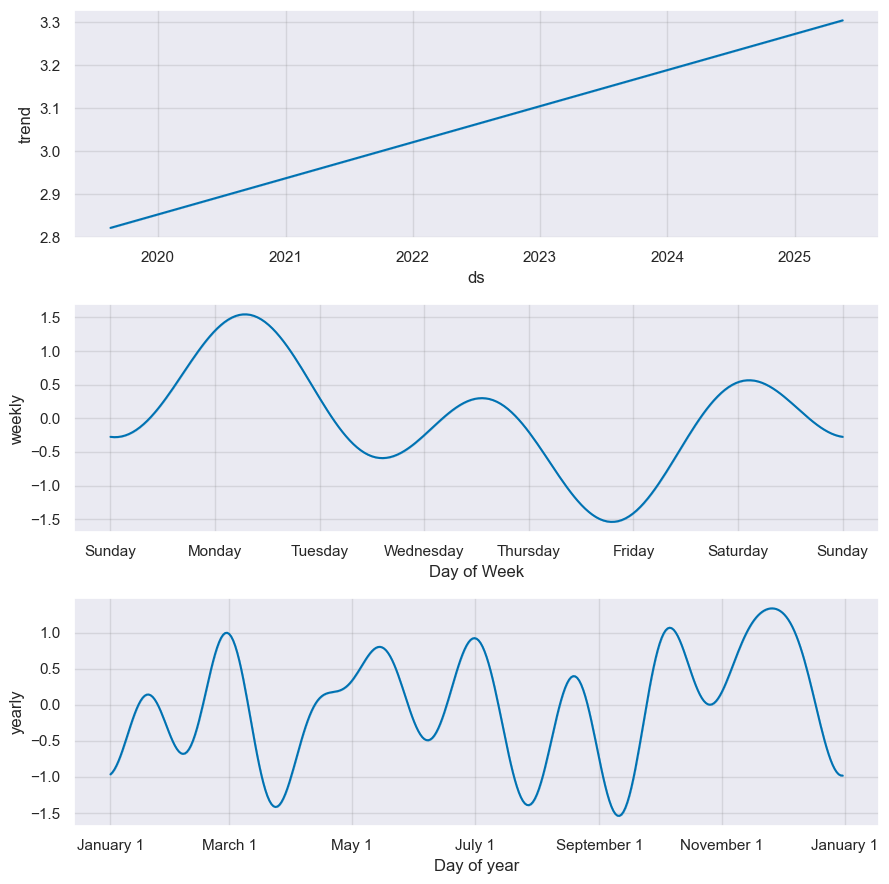

02:05:41 - cmdstanpy - INFO - Chain [1] start processing
02:05:41 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Media de 'yhat' para las predicciones del año 2025 para el equipo Paris SG: 3.1287175711809936


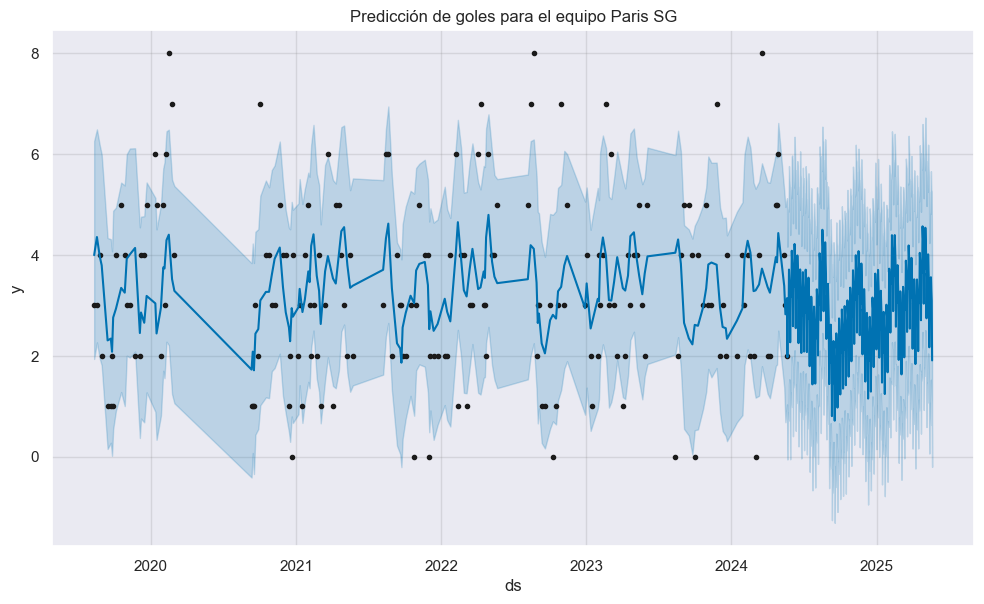

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

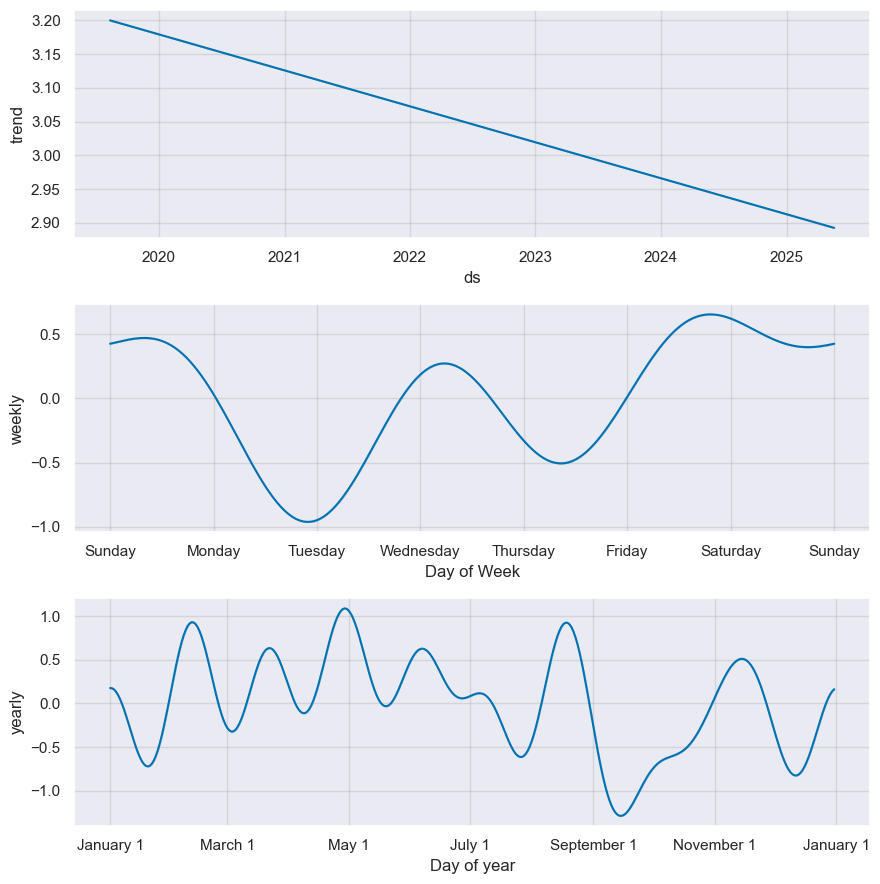


Media general de 'yhat' para las predicciones del año 2025 de todos los equipos: 3.2382188582447022


In [90]:
# Filtrar partidos con más de 2.5 goles
partidos_mas_25_goles = prophet_data[prophet_data['TGG'] > 2.5]

# Concatenar 'HomeTeam' y 'AwayTeam', contar las ocurrencias
equipos_mas_25 = pd.concat([partidos_mas_25_goles['HomeTeam'], partidos_mas_25_goles['AwayTeam']])
ranking_equipos = equipos_mas_25.value_counts().reset_index()
ranking_equipos.columns = ['Equipo', 'Veces > 2.5 goles']

# Obtener el top 10
top_10_equipos = ranking_equipos.head(10)

# Lista para almacenar las medias de yhat
medias_2025 = []

# Iterar sobre los equipos del top 10 y ajustar un modelo Prophet para cada uno
for equipo in top_10_equipos['Equipo']:
    # Filtrar el DataFrame original para incluir solo los partidos del equipo actual
    equipo_data = prophet_data[(prophet_data['HomeTeam'] == equipo) | (prophet_data['AwayTeam'] == equipo)]
    
    # Preparar los datos para Prophet
    equipo_data = equipo_data[['TGG']].reset_index()
    equipo_data.columns = ['ds', 'y']
    
    # Inicializar y ajustar el modelo
    m = Prophet()
    m.fit(equipo_data)
    
    # Crear un DataFrame para predicciones futuras
    future = m.make_future_dataframe(periods=365)  # Cambia el número de días según sea necesario
    
    # Hacer predicciones
    forecast = m.predict(future)
    
    # Calcular la media de 'yhat' para el año 2025
    media_prediccion_2025 = forecast[forecast['ds'].dt.year == 2025]['yhat'].mean()
    medias_2025.append(media_prediccion_2025)
    
    # Mostrar la media de 'yhat' para el equipo actual
    print(f"Media de 'yhat' para las predicciones del año 2025 para el equipo {equipo}: {media_prediccion_2025}")
    
    # Graficar los resultados y componentes
    fig1 = m.plot(forecast)
    plt.title(f'Predicción de goles para el equipo {equipo}')
    plt.show()
    
    fig2 = m.plot_components(forecast)
    plt.show()

# Calcular la media general de 'yhat' para el año 2025
media_general_2025 = sum(medias_2025) / len(medias_2025)
print(f"\nMedia general de 'yhat' para las predicciones del año 2025 de todos los equipos: {media_general_2025}")

02:07:27 - cmdstanpy - INFO - Chain [1] start processing
02:07:27 - cmdstanpy - INFO - Chain [1] done processing


Media de 'yhat' para las predicciones del año 2025 para el equipo Getafe: 2.686680655996247


C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


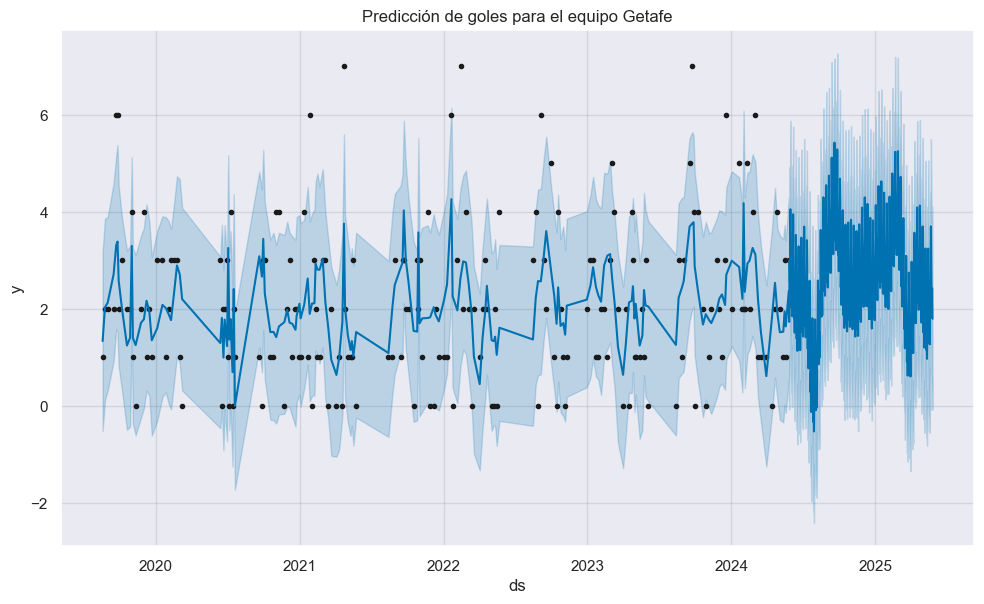

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

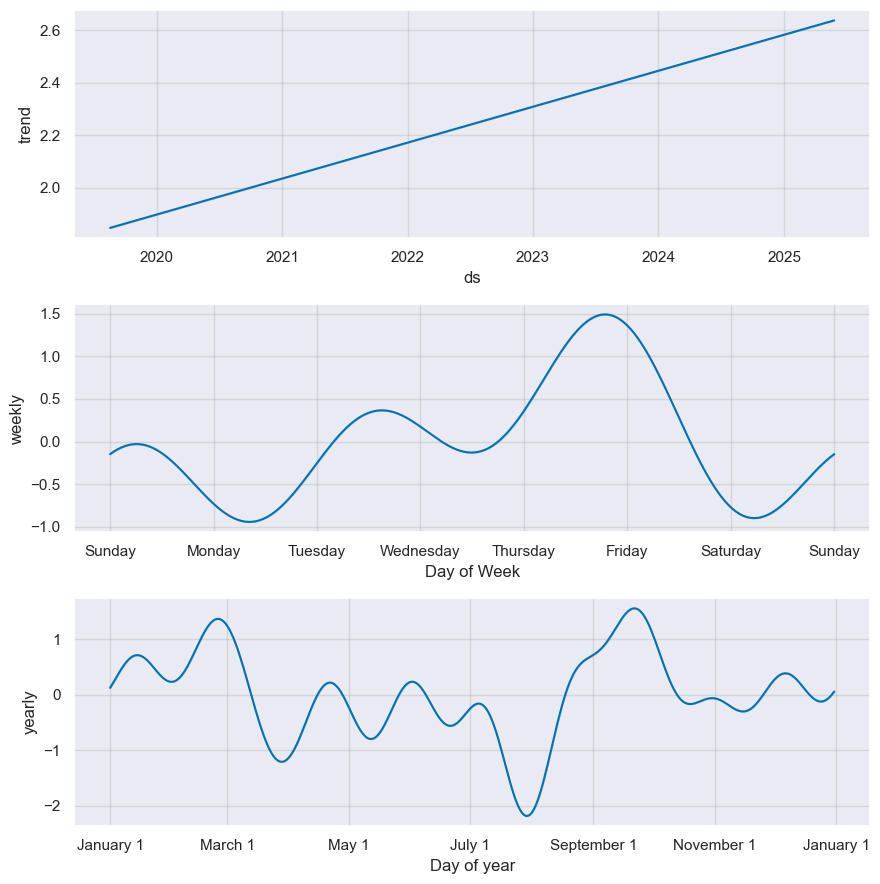

02:07:29 - cmdstanpy - INFO - Chain [1] start processing
02:07:29 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Media de 'yhat' para las predicciones del año 2025 para el equipo Ath Bilbao: 2.6365279864583795


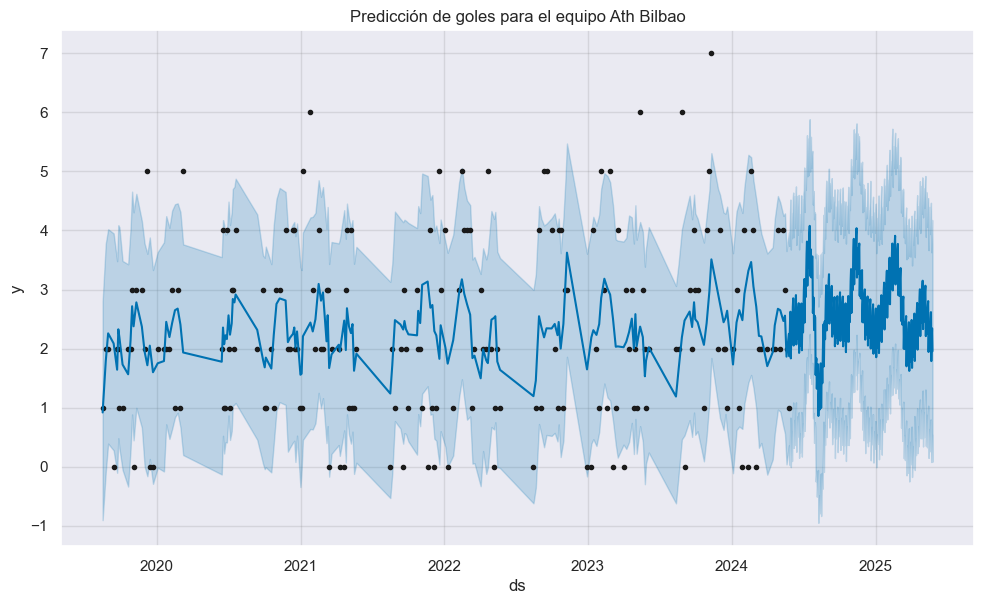

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

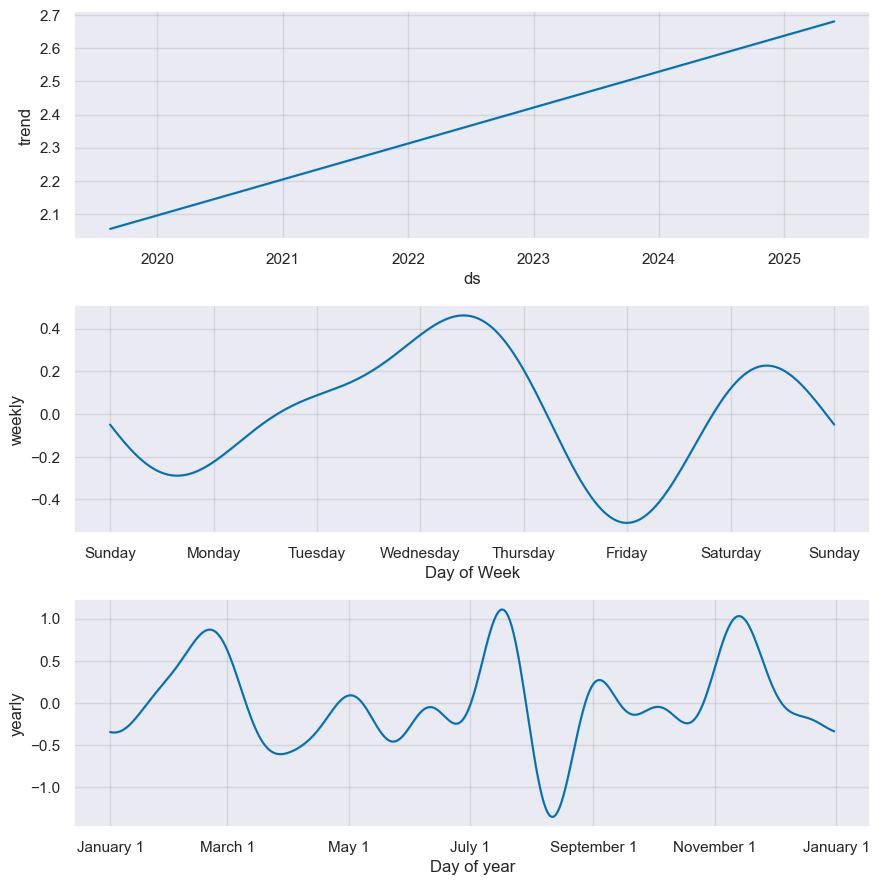

02:07:30 - cmdstanpy - INFO - Chain [1] start processing
02:07:30 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Media de 'yhat' para las predicciones del año 2025 para el equipo Osasuna: 2.2334835573681366


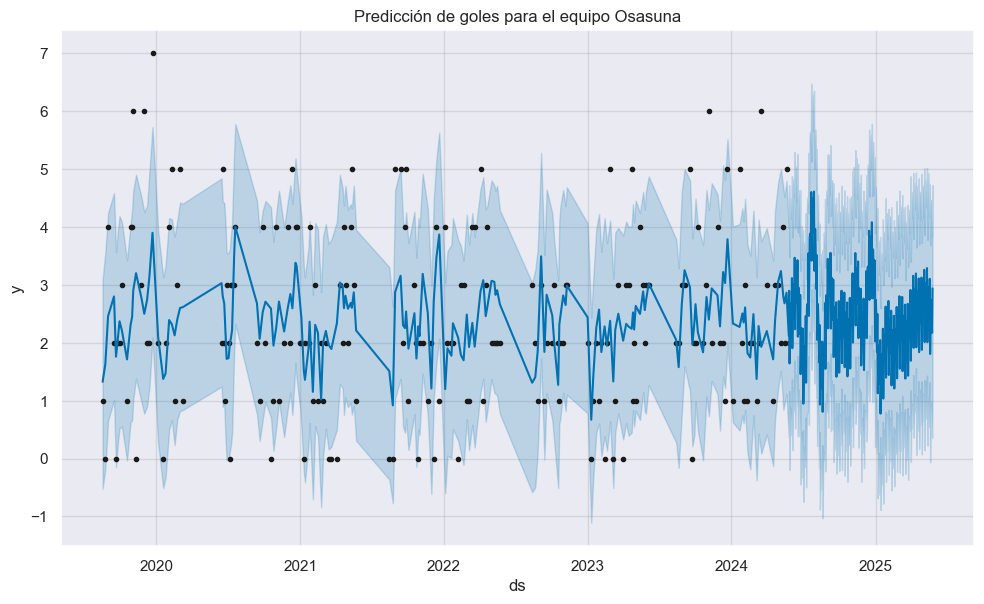

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

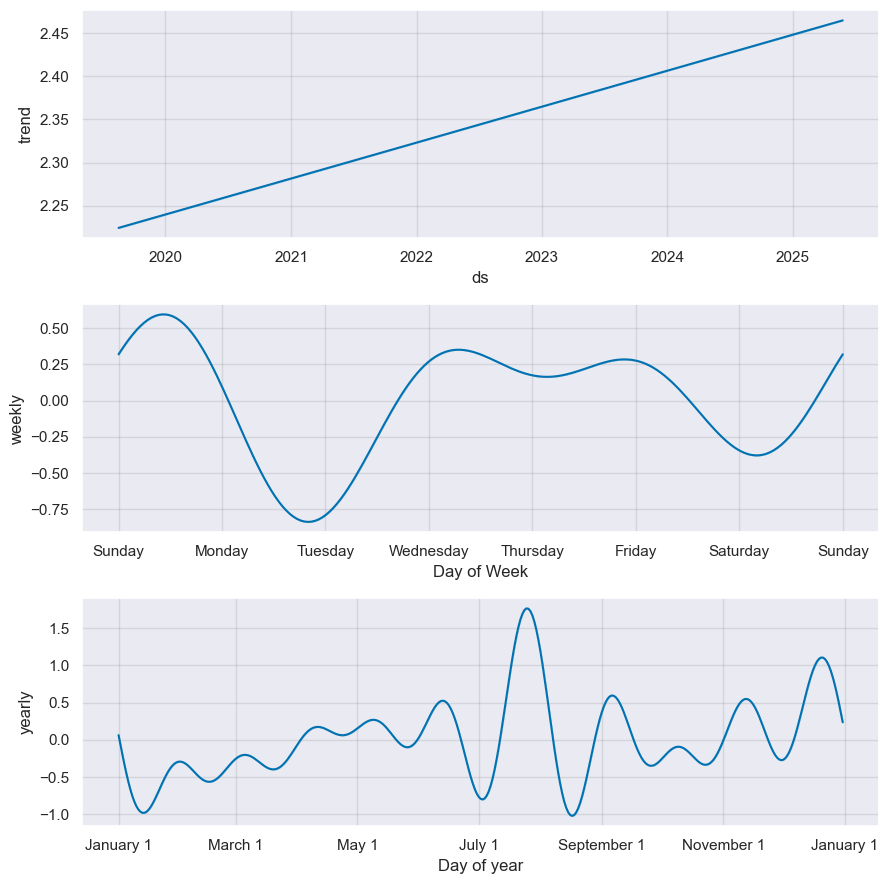

02:07:31 - cmdstanpy - INFO - Chain [1] start processing
02:07:31 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Media de 'yhat' para las predicciones del año 2025 para el equipo Sevilla: 2.8964711903794442


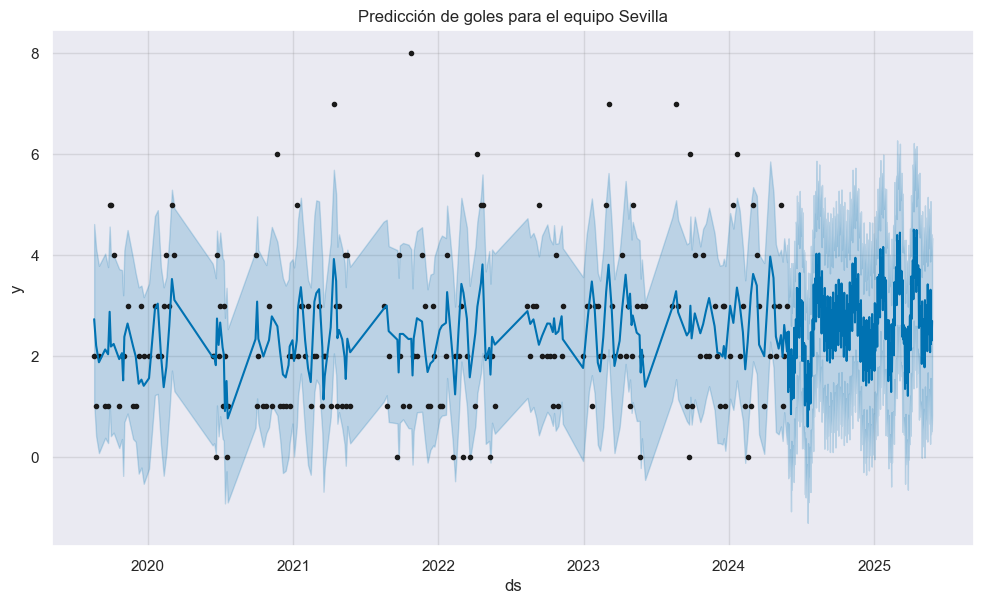

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

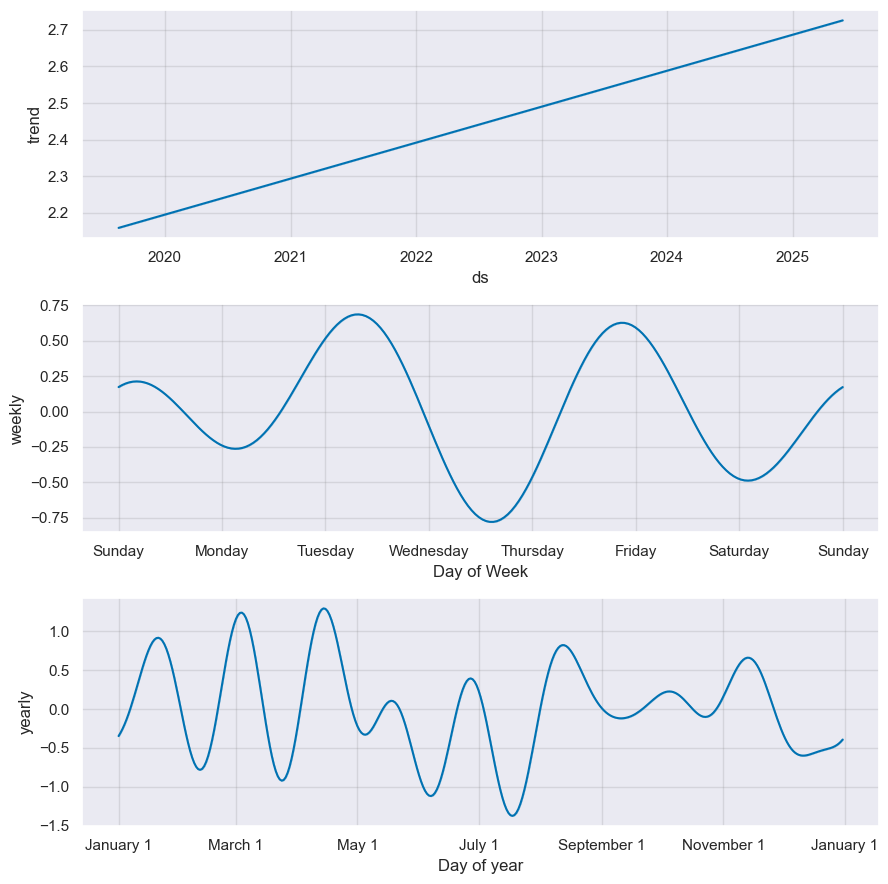

02:07:32 - cmdstanpy - INFO - Chain [1] start processing
02:07:32 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Media de 'yhat' para las predicciones del año 2025 para el equipo Sociedad: 1.6115925156137827


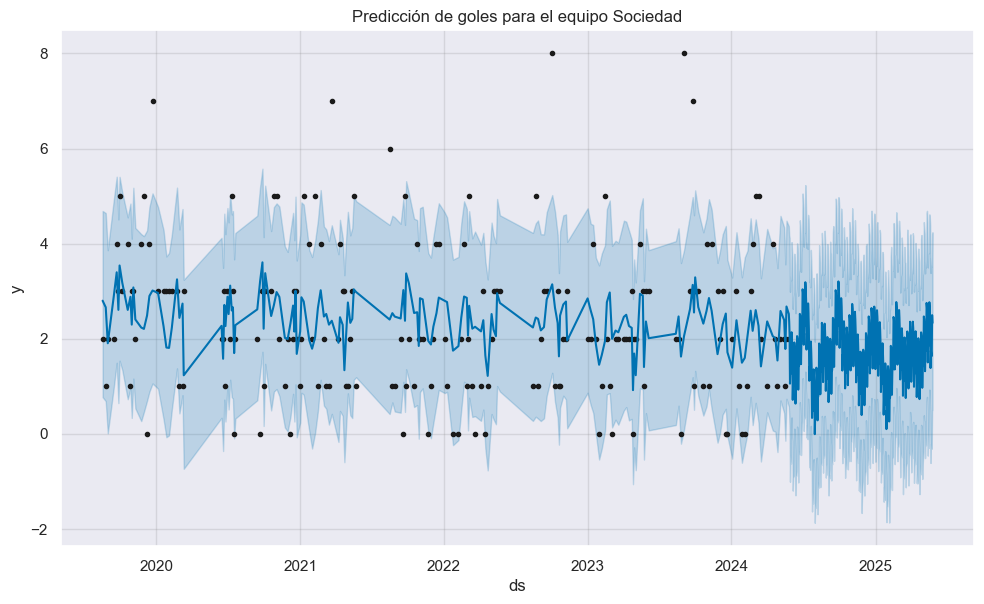

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

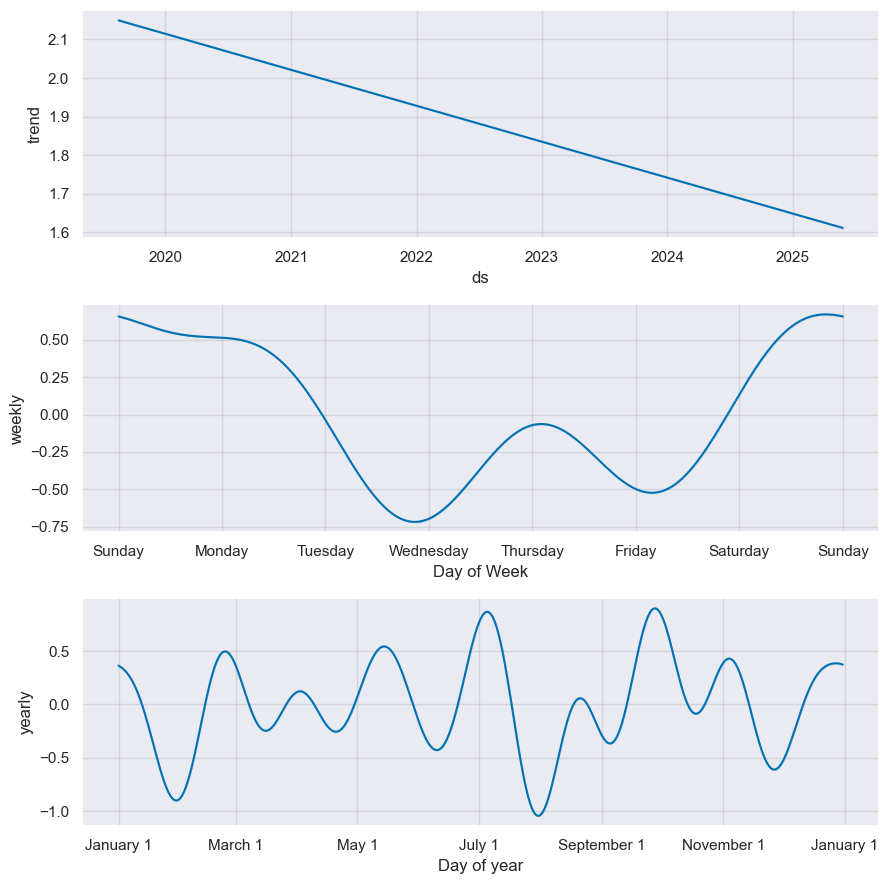

02:07:33 - cmdstanpy - INFO - Chain [1] start processing
02:07:33 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Media de 'yhat' para las predicciones del año 2025 para el equipo Wolves: 3.133481716193741


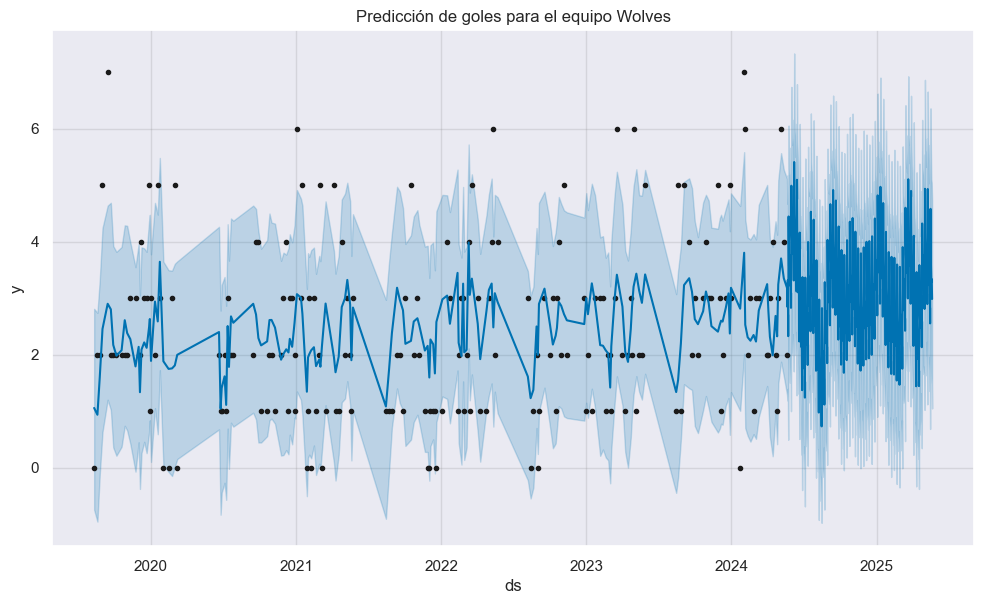

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

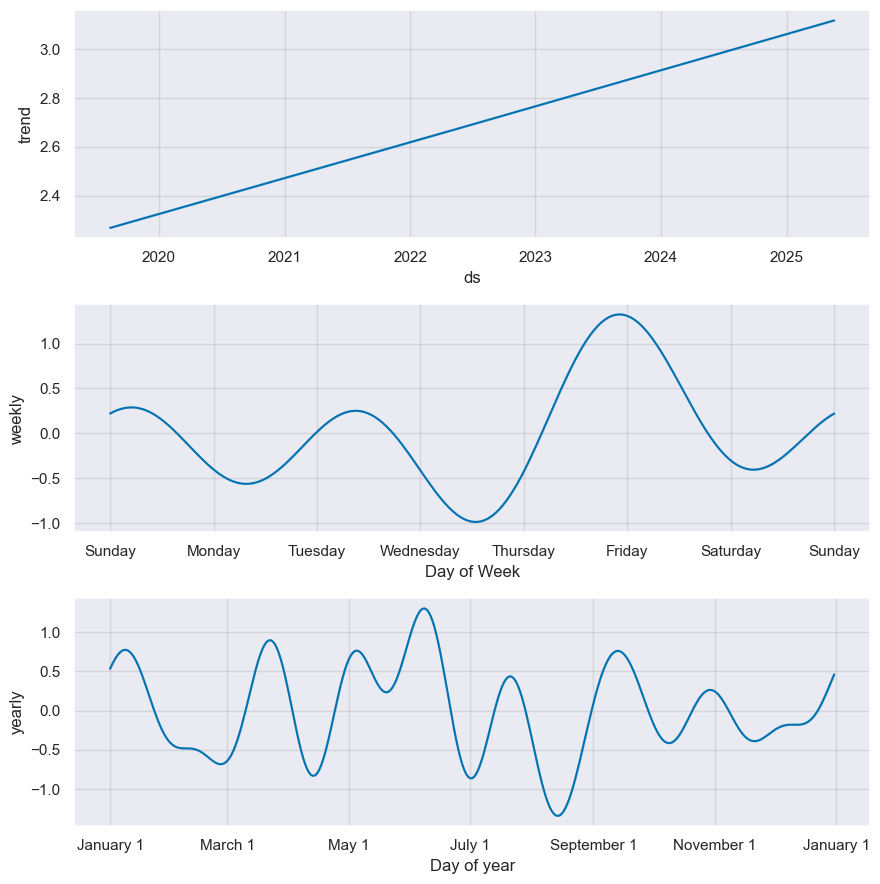

02:07:35 - cmdstanpy - INFO - Chain [1] start processing
02:07:35 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Media de 'yhat' para las predicciones del año 2025 para el equipo Torino: 1.6632934495147347


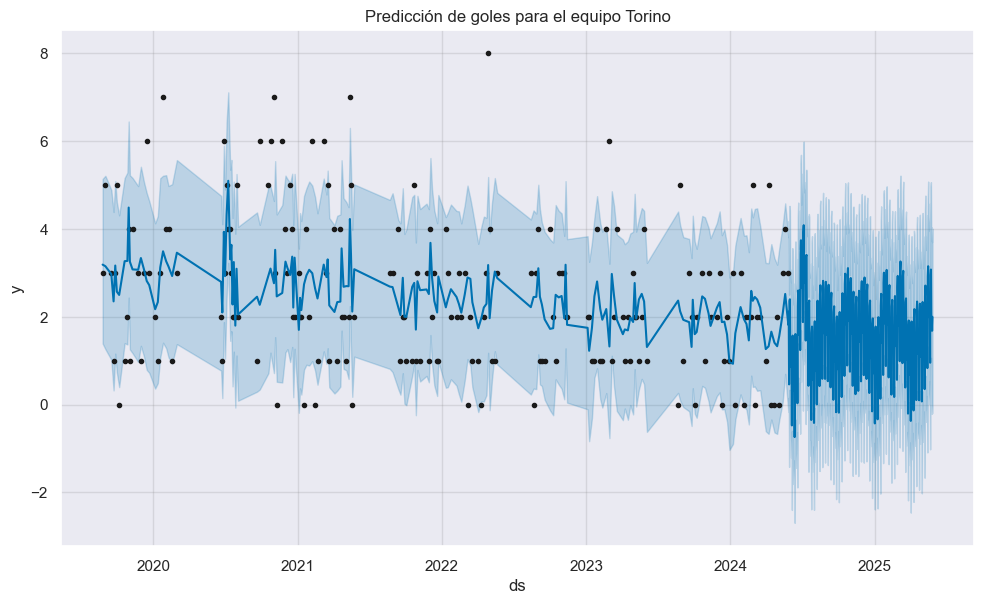

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

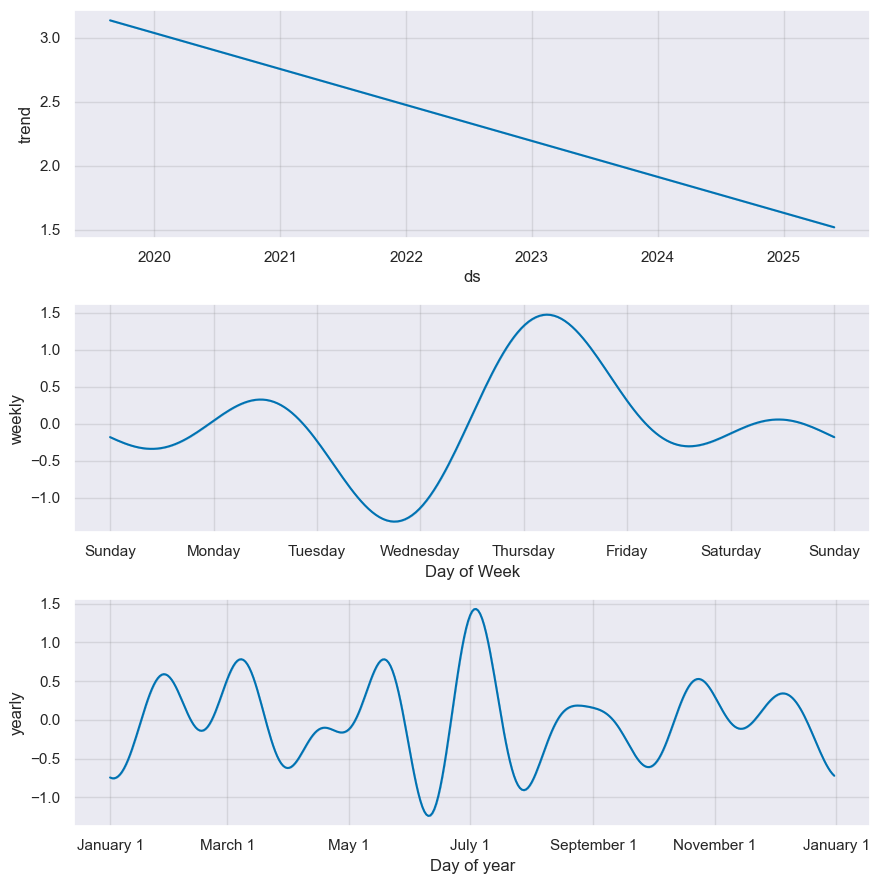

02:07:36 - cmdstanpy - INFO - Chain [1] start processing
02:07:36 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Media de 'yhat' para las predicciones del año 2025 para el equipo Crystal Palace: 3.0635905437185897


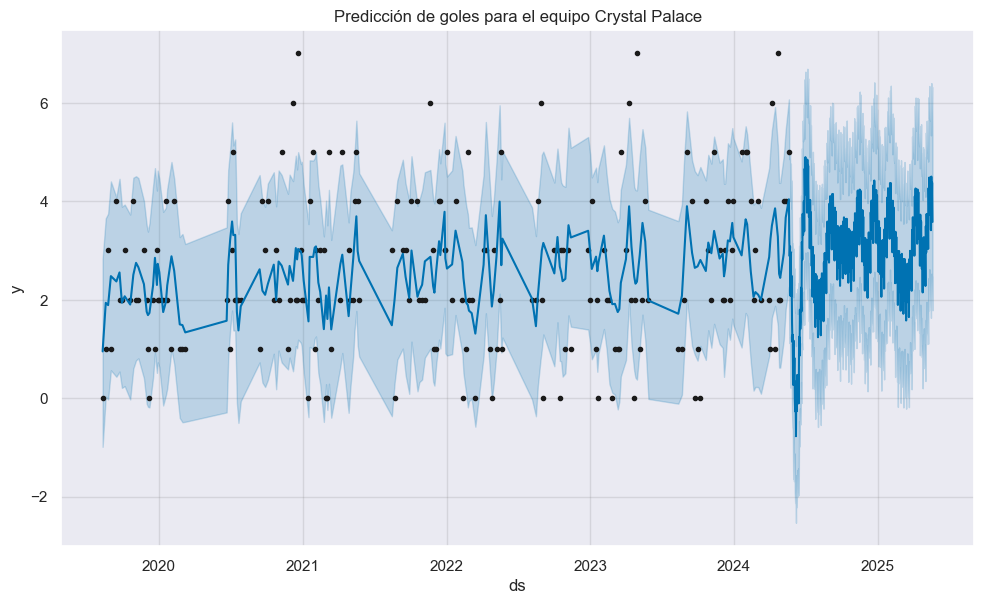

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

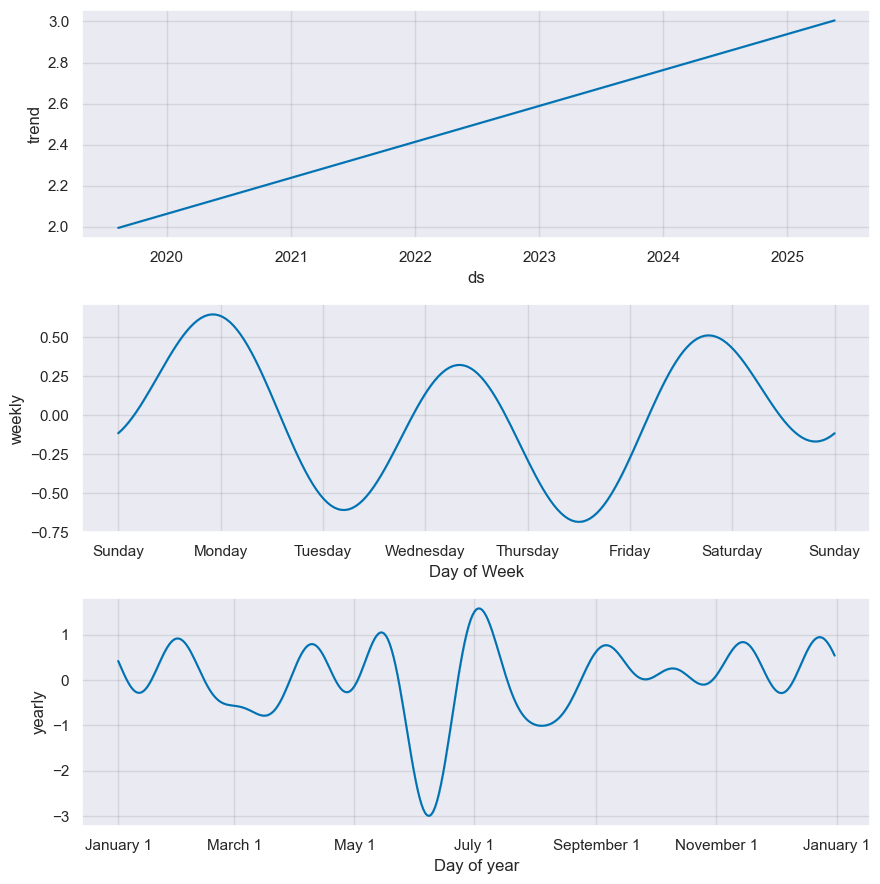

02:07:37 - cmdstanpy - INFO - Chain [1] start processing
02:07:37 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Media de 'yhat' para las predicciones del año 2025 para el equipo Celta: 2.6875744998451037


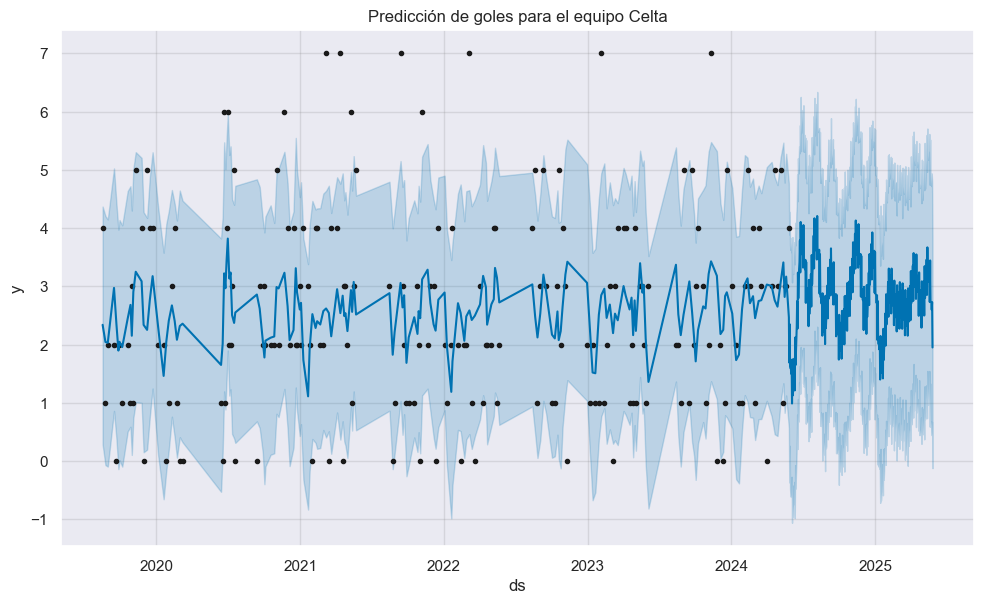

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

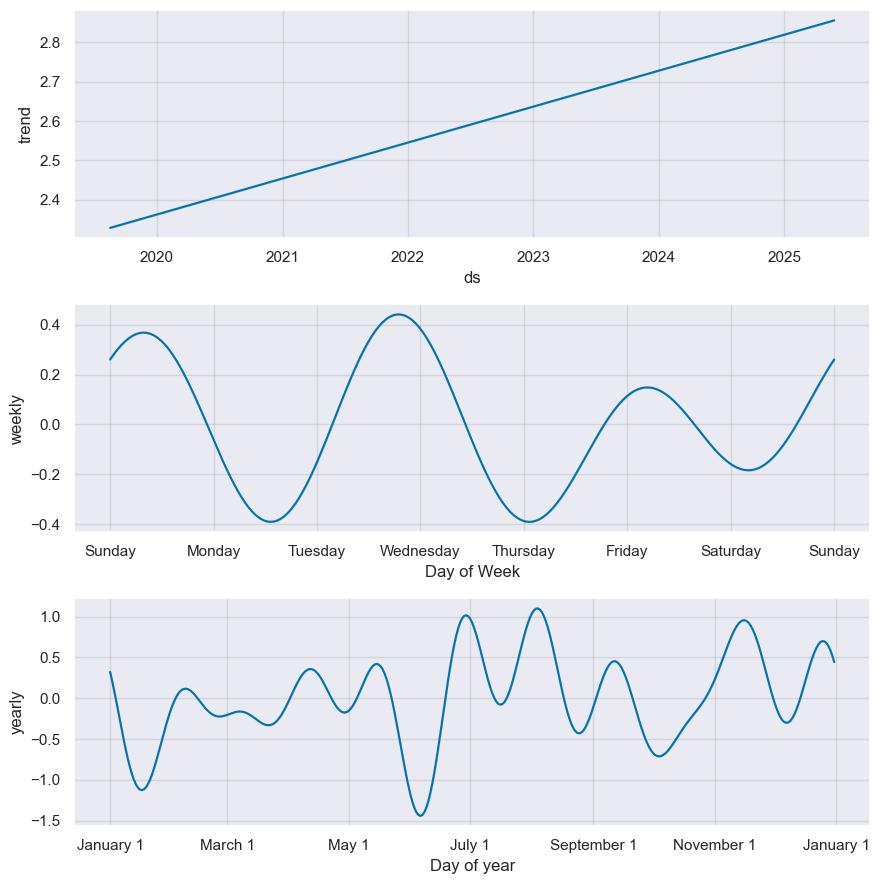

02:07:38 - cmdstanpy - INFO - Chain [1] start processing
02:07:38 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Media de 'yhat' para las predicciones del año 2025 para el equipo Everton: 2.3845630750960267


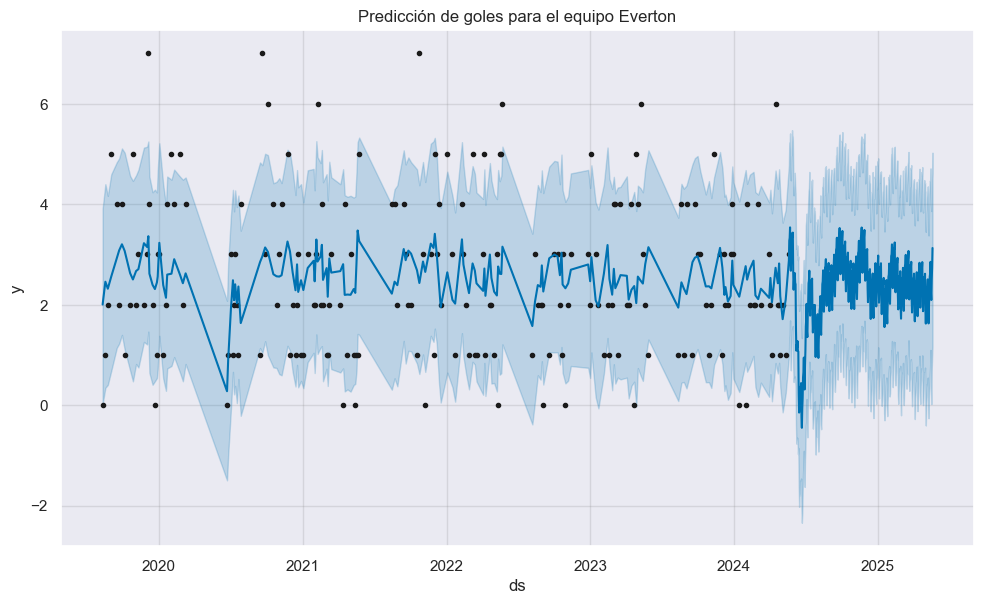

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

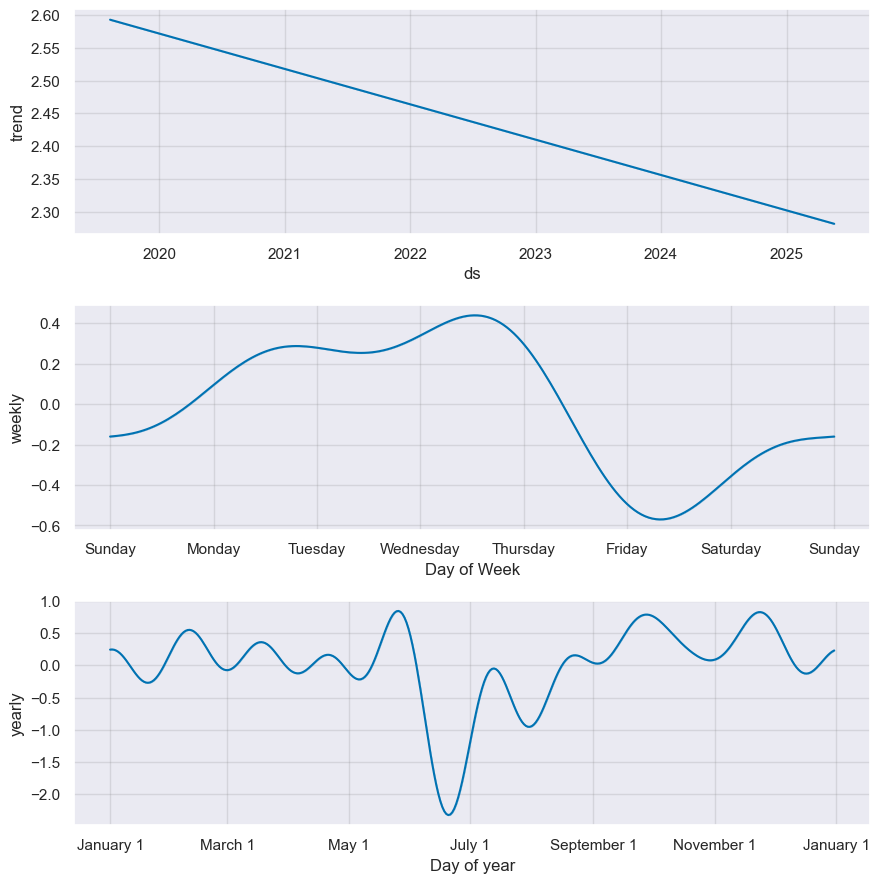


Media general de 'yhat' para las predicciones del año 2025 de todos los equipos con menos de 2.5 goles: 2.499725919018418


In [95]:
# Filtrar partidos con menos de 2.5 goles
partidos_menos_25_goles = prophet_data[prophet_data['TGG'] < 2.5]

# Concatenar 'HomeTeam' y 'AwayTeam', contar las ocurrencias
equipos_menos_25 = pd.concat([partidos_menos_25_goles['HomeTeam'], partidos_menos_25_goles['AwayTeam']])
ranking_equipos_menos_25 = equipos_menos_25.value_counts().reset_index()
ranking_equipos_menos_25.columns = ['Equipo', 'Veces < 2.5 goles']

# Obtener el top 10 de equipos con menos de 2.5 goles por partido
top_10_equipos_menos_25 = ranking_equipos_menos_25.head(10)

# Lista para almacenar las medias de yhat
medias_2025_menos_25 = []

# Iterar sobre los equipos del top 10 y ajustar un modelo Prophet para cada uno
for equipo in top_10_equipos_menos_25['Equipo']:
    # Filtrar el DataFrame original para incluir solo los partidos del equipo actual
    equipo_data = prophet_data[(prophet_data['HomeTeam'] == equipo) | (prophet_data['AwayTeam'] == equipo)]
    
    # Preparar los datos para Prophet
    equipo_data = equipo_data[['TGG']].reset_index()
    equipo_data.columns = ['ds', 'y']
    
    # Inicializar y ajustar el modelo
    m = Prophet()
    m.fit(equipo_data)
    
    # Crear un DataFrame para predicciones futuras
    future = m.make_future_dataframe(periods=365)  # Cambia el número de días según sea necesario
    
    # Hacer predicciones
    forecast = m.predict(future)
    
    # Calcular la media de 'yhat' para el año 2025
    media_prediccion_2025 = forecast[forecast['ds'].dt.year == 2025]['yhat'].mean()
    medias_2025_menos_25.append(media_prediccion_2025)
    
    # Mostrar la media de 'yhat' para el equipo actual
    print(f"Media de 'yhat' para las predicciones del año 2025 para el equipo {equipo}: {media_prediccion_2025}")
    
    # Graficar los resultados y componentes
    fig1 = m.plot(forecast)
    plt.title(f'Predicción de goles para el equipo {equipo}')
    plt.show()
    
    fig2 = m.plot_components(forecast)
    plt.show()

# Calcular la media general de 'yhat' para el año 2025 de equipos con menos de 2.5 goles
media_general_2025_menos_25 = sum(medias_2025_menos_25) / len(medias_2025_menos_25)
print(f"\nMedia general de 'yhat' para las predicciones del año 2025 de todos los equipos con menos de 2.5 goles: {media_general_2025_menos_25}")